Exploratory Data Analysis

In [114]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [115]:
pd.set_option('display.max_columns', None)

In [116]:
df = pd.read_csv('./loan_default_cleaned.csv', on_bad_lines='warn')
df

,Unnamed: 0,id,member_id,loan_amount,funded_amount,funded_amount_investors,term,interest_rate,installment,employment_length,home_ownership,annual_income,verification_status,issue_date,loan_status,purpose,zip_code,address_state,debt_to_income_ratio,no_delinquency_2yrs,earliest_credit_line,inquiries_last_6mths,months_since_last_delinquency,no_open_accounts,public_records,revolving_balance,revolving_utillization,no_total_account,total_payment,total_payment_investors,total_received_principal,total_received_interest,last_payment_date,last_payment_amnt,last_credit_pull_date,repay_fail
0,0,2,2,0.0,0.0,0.00000,36 months,0.00,0.00,< 1 year,RENT,0.0,Not Verified,1999-12-01,Charged Off,major_purchase,000xx,ZZ,0.00,0.0,2001-01-01,0.0,NOT AVAILABLE,0.0,0.0,0.0,0.000,1.0,0.000000,0.00,0.00,0.00,2007-01-01,0.00,2007-01-01,1
1,1,545583,703644,2500.0,2500.0,2500.00000,36 months,13.98,85.42,4 years,RENT,20004.0,Not Verified,2010-07-01,Does not meet the credit policy. Status:Fully ...,other,487xx,MI,19.86,0.0,2005-08-01,5.0,NOT AVAILABLE,7.0,0.0,981.0,0.213,10.0,3075.291779,3075.29,2500.00,575.29,2013-07-01,90.85,2016-06-01,0
2,2,532101,687836,5000.0,5000.0,5000.00000,36 months,15.95,175.67,4 years,RENT,59000.0,Not Verified,2010-06-01,Charged Off,debt_consolidation,115xx,NY,19.57,0.0,1994-04-01,1.0,59.0,7.0,0.0,18773.0,0.999,15.0,2948.760000,2948.76,1909.02,873.81,2011-11-01,175.67,2012-03-01,1
3,3,877788,1092507,7000.0,7000.0,7000.00000,36 months,9.91,225.58,10+ years,MORTGAGE,53796.0,Not Verified,2011-09-01,Fully Paid,other,751xx,TX,10.80,3.0,1998-03-01,3.0,3.0,7.0,0.0,3269.0,0.472,20.0,8082.391880,8082.39,7000.00,1082.39,2014-03-01,1550.27,2014-03-01,0
4,4,875406,1089981,2000.0,2000.0,2000.00000,36 months,5.42,60.32,10+ years,RENT,30000.0,Not Verified,2011-09-01,Fully Paid,debt_consolidation,112xx,NY,3.60,0.0,1975-01-01,0.0,72.0,7.0,0.0,0.0,0.000,15.0,2161.663244,2161.66,2000.00,161.66,2014-02-01,53.12,2016-06-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37354,38475,849205,1060907,3000.0,3000.0,3000.00000,36 months,11.99,99.63,3 years,RENT,74250.0,Verified,2011-08-01,Fully Paid,credit_card,805xx,CO,22.17,0.0,2000-01-01,2.0,NOT AVAILABLE,12.0,0.0,16550.0,0.735,22.0,3586.619764,3586.62,3000.00,586.62,2014-08-01,100.30,2016-06-01,0
37355,38476,852914,1065048,10400.0,10400.0,10400.00000,36 months,13.49,352.88,9 years,RENT,62000.0,Source Verified,2011-08-01,Fully Paid,credit_card,442xx,OH,11.57,0.0,1999-04-01,1.0,NOT AVAILABLE,21.0,0.0,16898.0,0.397,33.0,12703.534030,12703.53,10400.00,2303.53,2014-09-01,393.08,2016-06-01,0
37356,38477,519553,671637,16000.0,10550.0,10531.35818,60 months,14.96,250.77,10+ years,MORTGAGE,95088.0,Source Verified,2010-05-01,Fully Paid,debt_consolidation,073xx,NJ,10.63,0.0,1995-12-01,1.0,NOT AVAILABLE,9.0,1.0,10386.0,0.622,25.0,14202.267530,14163.31,10550.00,3652.27,2013-06-01,5439.96,2016-02-01,0
37357,38478,825638,1034448,10000.0,10000.0,10000.00000,36 months,16.89,355.99,1 year,RENT,48720.0,Not Verified,2011-07-01,Fully Paid,debt_consolidation,061xx,CT,18.97,0.0,2007-07-01,2.0,NOT AVAILABLE,8.0,0.0,7301.0,0.533,12.0,12815.178320,12815.18,10000.00,2815.18,2014-08-01,380.63,2015-09-01,0


In [117]:
# drop unnamed column
df = df.drop(df.columns[0], axis=1)
df

,id,member_id,loan_amount,funded_amount,funded_amount_investors,term,interest_rate,installment,employment_length,home_ownership,annual_income,verification_status,issue_date,loan_status,purpose,zip_code,address_state,debt_to_income_ratio,no_delinquency_2yrs,earliest_credit_line,inquiries_last_6mths,months_since_last_delinquency,no_open_accounts,public_records,revolving_balance,revolving_utillization,no_total_account,total_payment,total_payment_investors,total_received_principal,total_received_interest,last_payment_date,last_payment_amnt,last_credit_pull_date,repay_fail
0,2,2,0.0,0.0,0.00000,36 months,0.00,0.00,< 1 year,RENT,0.0,Not Verified,1999-12-01,Charged Off,major_purchase,000xx,ZZ,0.00,0.0,2001-01-01,0.0,NOT AVAILABLE,0.0,0.0,0.0,0.000,1.0,0.000000,0.00,0.00,0.00,2007-01-01,0.00,2007-01-01,1
1,545583,703644,2500.0,2500.0,2500.00000,36 months,13.98,85.42,4 years,RENT,20004.0,Not Verified,2010-07-01,Does not meet the credit policy. Status:Fully ...,other,487xx,MI,19.86,0.0,2005-08-01,5.0,NOT AVAILABLE,7.0,0.0,981.0,0.213,10.0,3075.291779,3075.29,2500.00,575.29,2013-07-01,90.85,2016-06-01,0
2,532101,687836,5000.0,5000.0,5000.00000,36 months,15.95,175.67,4 years,RENT,59000.0,Not Verified,2010-06-01,Charged Off,debt_consolidation,115xx,NY,19.57,0.0,1994-04-01,1.0,59.0,7.0,0.0,18773.0,0.999,15.0,2948.760000,2948.76,1909.02,873.81,2011-11-01,175.67,2012-03-01,1
3,877788,1092507,7000.0,7000.0,7000.00000,36 months,9.91,225.58,10+ years,MORTGAGE,53796.0,Not Verified,2011-09-01,Fully Paid,other,751xx,TX,10.80,3.0,1998-03-01,3.0,3.0,7.0,0.0,3269.0,0.472,20.0,8082.391880,8082.39,7000.00,1082.39,2014-03-01,1550.27,2014-03-01,0
4,875406,1089981,2000.0,2000.0,2000.00000,36 months,5.42,60.32,10+ years,RENT,30000.0,Not Verified,2011-09-01,Fully Paid,debt_consolidation,112xx,NY,3.60,0.0,1975-01-01,0.0,72.0,7.0,0.0,0.0,0.000,15.0,2161.663244,2161.66,2000.00,161.66,2014-02-01,53.12,2016-06-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37354,849205,1060907,3000.0,3000.0,3000.00000,36 months,11.99,99.63,3 years,RENT,74250.0,Verified,2011-08-01,Fully Paid,credit_card,805xx,CO,22.17,0.0,2000-01-01,2.0,NOT AVAILABLE,12.0,0.0,16550.0,0.735,22.0,3586.619764,3586.62,3000.00,586.62,2014-08-01,100.30,2016-06-01,0
37355,852914,1065048,10400.0,10400.0,10400.00000,36 months,13.49,352.88,9 years,RENT,62000.0,Source Verified,2011-08-01,Fully Paid,credit_card,442xx,OH,11.57,0.0,1999-04-01,1.0,NOT AVAILABLE,21.0,0.0,16898.0,0.397,33.0,12703.534030,12703.53,10400.00,2303.53,2014-09-01,393.08,2016-06-01,0
37356,519553,671637,16000.0,10550.0,10531.35818,60 months,14.96,250.77,10+ years,MORTGAGE,95088.0,Source Verified,2010-05-01,Fully Paid,debt_consolidation,073xx,NJ,10.63,0.0,1995-12-01,1.0,NOT AVAILABLE,9.0,1.0,10386.0,0.622,25.0,14202.267530,14163.31,10550.00,3652.27,2013-06-01,5439.96,2016-02-01,0
37357,825638,1034448,10000.0,10000.0,10000.00000,36 months,16.89,355.99,1 year,RENT,48720.0,Not Verified,2011-07-01,Fully Paid,debt_consolidation,061xx,CT,18.97,0.0,2007-07-01,2.0,NOT AVAILABLE,8.0,0.0,7301.0,0.533,12.0,12815.178320,12815.18,10000.00,2815.18,2014-08-01,380.63,2015-09-01,0


In [118]:
# copy to new df
loan_df = df.copy()
loan_df

,id,member_id,loan_amount,funded_amount,funded_amount_investors,term,interest_rate,installment,employment_length,home_ownership,annual_income,verification_status,issue_date,loan_status,purpose,zip_code,address_state,debt_to_income_ratio,no_delinquency_2yrs,earliest_credit_line,inquiries_last_6mths,months_since_last_delinquency,no_open_accounts,public_records,revolving_balance,revolving_utillization,no_total_account,total_payment,total_payment_investors,total_received_principal,total_received_interest,last_payment_date,last_payment_amnt,last_credit_pull_date,repay_fail
0,2,2,0.0,0.0,0.00000,36 months,0.00,0.00,< 1 year,RENT,0.0,Not Verified,1999-12-01,Charged Off,major_purchase,000xx,ZZ,0.00,0.0,2001-01-01,0.0,NOT AVAILABLE,0.0,0.0,0.0,0.000,1.0,0.000000,0.00,0.00,0.00,2007-01-01,0.00,2007-01-01,1
1,545583,703644,2500.0,2500.0,2500.00000,36 months,13.98,85.42,4 years,RENT,20004.0,Not Verified,2010-07-01,Does not meet the credit policy. Status:Fully ...,other,487xx,MI,19.86,0.0,2005-08-01,5.0,NOT AVAILABLE,7.0,0.0,981.0,0.213,10.0,3075.291779,3075.29,2500.00,575.29,2013-07-01,90.85,2016-06-01,0
2,532101,687836,5000.0,5000.0,5000.00000,36 months,15.95,175.67,4 years,RENT,59000.0,Not Verified,2010-06-01,Charged Off,debt_consolidation,115xx,NY,19.57,0.0,1994-04-01,1.0,59.0,7.0,0.0,18773.0,0.999,15.0,2948.760000,2948.76,1909.02,873.81,2011-11-01,175.67,2012-03-01,1
3,877788,1092507,7000.0,7000.0,7000.00000,36 months,9.91,225.58,10+ years,MORTGAGE,53796.0,Not Verified,2011-09-01,Fully Paid,other,751xx,TX,10.80,3.0,1998-03-01,3.0,3.0,7.0,0.0,3269.0,0.472,20.0,8082.391880,8082.39,7000.00,1082.39,2014-03-01,1550.27,2014-03-01,0
4,875406,1089981,2000.0,2000.0,2000.00000,36 months,5.42,60.32,10+ years,RENT,30000.0,Not Verified,2011-09-01,Fully Paid,debt_consolidation,112xx,NY,3.60,0.0,1975-01-01,0.0,72.0,7.0,0.0,0.0,0.000,15.0,2161.663244,2161.66,2000.00,161.66,2014-02-01,53.12,2016-06-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37354,849205,1060907,3000.0,3000.0,3000.00000,36 months,11.99,99.63,3 years,RENT,74250.0,Verified,2011-08-01,Fully Paid,credit_card,805xx,CO,22.17,0.0,2000-01-01,2.0,NOT AVAILABLE,12.0,0.0,16550.0,0.735,22.0,3586.619764,3586.62,3000.00,586.62,2014-08-01,100.30,2016-06-01,0
37355,852914,1065048,10400.0,10400.0,10400.00000,36 months,13.49,352.88,9 years,RENT,62000.0,Source Verified,2011-08-01,Fully Paid,credit_card,442xx,OH,11.57,0.0,1999-04-01,1.0,NOT AVAILABLE,21.0,0.0,16898.0,0.397,33.0,12703.534030,12703.53,10400.00,2303.53,2014-09-01,393.08,2016-06-01,0
37356,519553,671637,16000.0,10550.0,10531.35818,60 months,14.96,250.77,10+ years,MORTGAGE,95088.0,Source Verified,2010-05-01,Fully Paid,debt_consolidation,073xx,NJ,10.63,0.0,1995-12-01,1.0,NOT AVAILABLE,9.0,1.0,10386.0,0.622,25.0,14202.267530,14163.31,10550.00,3652.27,2013-06-01,5439.96,2016-02-01,0
37357,825638,1034448,10000.0,10000.0,10000.00000,36 months,16.89,355.99,1 year,RENT,48720.0,Not Verified,2011-07-01,Fully Paid,debt_consolidation,061xx,CT,18.97,0.0,2007-07-01,2.0,NOT AVAILABLE,8.0,0.0,7301.0,0.533,12.0,12815.178320,12815.18,10000.00,2815.18,2014-08-01,380.63,2015-09-01,0


In [119]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37359 entries, 0 to 37358
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             37359 non-null  int64  
 1   member_id                      37359 non-null  int64  
 2   loan_amount                    37359 non-null  float64
 3   funded_amount                  37359 non-null  float64
 4   funded_amount_investors        37359 non-null  float64
 5   term                           37359 non-null  object 
 6   interest_rate                  37359 non-null  float64
 7   installment                    37359 non-null  float64
 8   employment_length              37359 non-null  object 
 9   home_ownership                 37359 non-null  object 
 10  annual_income                  37359 non-null  float64
 11  verification_status            37359 non-null  object 
 12  issue_date                     37359 non-null 

In [120]:
# drop columns that are irrelevant 
loan_df= loan_df.drop(['id', 'member_id','zip_code'], axis=1)
loan_df

,loan_amount,funded_amount,funded_amount_investors,term,interest_rate,installment,employment_length,home_ownership,annual_income,verification_status,issue_date,loan_status,purpose,address_state,debt_to_income_ratio,no_delinquency_2yrs,earliest_credit_line,inquiries_last_6mths,months_since_last_delinquency,no_open_accounts,public_records,revolving_balance,revolving_utillization,no_total_account,total_payment,total_payment_investors,total_received_principal,total_received_interest,last_payment_date,last_payment_amnt,last_credit_pull_date,repay_fail
0,0.0,0.0,0.00000,36 months,0.00,0.00,< 1 year,RENT,0.0,Not Verified,1999-12-01,Charged Off,major_purchase,ZZ,0.00,0.0,2001-01-01,0.0,NOT AVAILABLE,0.0,0.0,0.0,0.000,1.0,0.000000,0.00,0.00,0.00,2007-01-01,0.00,2007-01-01,1
1,2500.0,2500.0,2500.00000,36 months,13.98,85.42,4 years,RENT,20004.0,Not Verified,2010-07-01,Does not meet the credit policy. Status:Fully ...,other,MI,19.86,0.0,2005-08-01,5.0,NOT AVAILABLE,7.0,0.0,981.0,0.213,10.0,3075.291779,3075.29,2500.00,575.29,2013-07-01,90.85,2016-06-01,0
2,5000.0,5000.0,5000.00000,36 months,15.95,175.67,4 years,RENT,59000.0,Not Verified,2010-06-01,Charged Off,debt_consolidation,NY,19.57,0.0,1994-04-01,1.0,59.0,7.0,0.0,18773.0,0.999,15.0,2948.760000,2948.76,1909.02,873.81,2011-11-01,175.67,2012-03-01,1
3,7000.0,7000.0,7000.00000,36 months,9.91,225.58,10+ years,MORTGAGE,53796.0,Not Verified,2011-09-01,Fully Paid,other,TX,10.80,3.0,1998-03-01,3.0,3.0,7.0,0.0,3269.0,0.472,20.0,8082.391880,8082.39,7000.00,1082.39,2014-03-01,1550.27,2014-03-01,0
4,2000.0,2000.0,2000.00000,36 months,5.42,60.32,10+ years,RENT,30000.0,Not Verified,2011-09-01,Fully Paid,debt_consolidation,NY,3.60,0.0,1975-01-01,0.0,72.0,7.0,0.0,0.0,0.000,15.0,2161.663244,2161.66,2000.00,161.66,2014-02-01,53.12,2016-06-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37354,3000.0,3000.0,3000.00000,36 months,11.99,99.63,3 years,RENT,74250.0,Verified,2011-08-01,Fully Paid,credit_card,CO,22.17,0.0,2000-01-01,2.0,NOT AVAILABLE,12.0,0.0,16550.0,0.735,22.0,3586.619764,3586.62,3000.00,586.62,2014-08-01,100.30,2016-06-01,0
37355,10400.0,10400.0,10400.00000,36 months,13.49,352.88,9 years,RENT,62000.0,Source Verified,2011-08-01,Fully Paid,credit_card,OH,11.57,0.0,1999-04-01,1.0,NOT AVAILABLE,21.0,0.0,16898.0,0.397,33.0,12703.534030,12703.53,10400.00,2303.53,2014-09-01,393.08,2016-06-01,0
37356,16000.0,10550.0,10531.35818,60 months,14.96,250.77,10+ years,MORTGAGE,95088.0,Source Verified,2010-05-01,Fully Paid,debt_consolidation,NJ,10.63,0.0,1995-12-01,1.0,NOT AVAILABLE,9.0,1.0,10386.0,0.622,25.0,14202.267530,14163.31,10550.00,3652.27,2013-06-01,5439.96,2016-02-01,0
37357,10000.0,10000.0,10000.00000,36 months,16.89,355.99,1 year,RENT,48720.0,Not Verified,2011-07-01,Fully Paid,debt_consolidation,CT,18.97,0.0,2007-07-01,2.0,NOT AVAILABLE,8.0,0.0,7301.0,0.533,12.0,12815.178320,12815.18,10000.00,2815.18,2014-08-01,380.63,2015-09-01,0


In [121]:
loan_df.describe()

,loan_amount,funded_amount,funded_amount_investors,interest_rate,installment,annual_income,debt_to_income_ratio,no_delinquency_2yrs,inquiries_last_6mths,no_open_accounts,public_records,revolving_balance,revolving_utillization,no_total_account,total_payment,total_payment_investors,total_received_principal,total_received_interest,last_payment_amnt,repay_fail
count,37359.000000,37359.000000,37359.000000,37359.000000,37359.000000,3.735900e+04,37359.000000,37359.000000,37359.000000,37359.000000,37359.000000,3.735900e+04,37359.000000,37359.000000,37359.000000,37359.000000,37359.000000,37359.000000,37359.000000,37359.000000
mean,11175.254959,10909.532509,10216.064141,12.185886,325.593788,6.966131e+04,13.391598,0.152600,1.084451,9.373350,0.056372,1.439157e+04,0.492771,22.156294,12095.234585,11374.017508,9738.676406,2255.427452,2643.667212,0.147889
std,7409.659787,7151.590405,7141.810716,3.699925,209.300192,6.496656e+04,6.719999,0.508639,1.537916,4.492752,0.243073,2.202812e+04,0.283258,11.571297,9019.261542,8966.185350,7059.101854,2579.251286,4416.864911,0.354995
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5500.000000,5300.000000,4975.000000,9.630000,167.540000,4.100000e+04,8.230000,0.000000,0.000000,6.000000,0.000000,3.699500e+03,0.260000,13.000000,5537.420011,4890.640000,4500.000000,671.935000,216.150000,0.000000
50%,10000.000000,9600.000000,8640.053392,11.990000,280.700000,6.000000e+04,13.500000,0.000000,1.000000,9.000000,0.000000,8.943000e+03,0.498000,20.000000,9810.990176,9064.390000,8000.000000,1356.480000,535.640000,0.000000
75%,15000.000000,15000.000000,14150.000000,14.720000,433.180000,8.300400e+04,18.690000,0.000000,2.000000,12.000000,0.000000,1.740200e+04,0.728000,29.000000,16507.996035,15615.455000,13600.000000,2822.370000,3225.395000,0.000000
max,35000.000000,35000.000000,35000.000000,24.110000,1305.190000,6.000000e+06,29.990000,11.000000,33.000000,47.000000,5.000000,1.207359e+06,1.190000,90.000000,58563.679930,58563.680000,35000.020000,23611.100000,36115.200000,1.000000


### Data Binning

Create New Column - Last Payment Date Category

In [122]:
# create new column - days since last payment date
index = loan_df.columns.get_loc("last_payment_date") + 1
loan_df.insert(index, "year_since_last_payment_date", 0)
loan_df.insert(index, "last_payment_date_category", 0)

In [123]:
from datetime import date

# Returns the current local date
today = date.today()
print("Today date is: ", today)

Today date is:  2024-08-05


In [124]:
date_df = loan_df[["last_payment_date","year_since_last_payment_date","last_payment_date_category"]]
date_df

,last_payment_date,year_since_last_payment_date,last_payment_date_category
0,2007-01-01,0,0
1,2013-07-01,0,0
2,2011-11-01,0,0
3,2014-03-01,0,0
4,2014-02-01,0,0
...,...,...,...
37354,2014-08-01,0,0
37355,2014-09-01,0,0
37356,2013-06-01,0,0
37357,2014-08-01,0,0


In [125]:
date_df['days_last_payment_date']= (pd.to_datetime(today) - pd.to_datetime(date_df['last_payment_date'])).dt.days + 1

C:\Users\Owner\AppData\Local\Temp\ipykernel_10104\1327562517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_df['days_last_payment_date']= (pd.to_datetime(today) - pd.to_datetime(date_df['last_payment_date'])).dt.days + 1


In [126]:
date_df

,last_payment_date,year_since_last_payment_date,last_payment_date_category,days_last_payment_date
0,2007-01-01,0,0,6427
1,2013-07-01,0,0,4054
2,2011-11-01,0,0,4662
3,2014-03-01,0,0,3811
4,2014-02-01,0,0,3839
...,...,...,...,...
37354,2014-08-01,0,0,3658
37355,2014-09-01,0,0,3627
37356,2013-06-01,0,0,4084
37357,2014-08-01,0,0,3658


In [127]:
# find the min and max days
min_days = date_df['days_last_payment_date'].min()
print("Min days:", min_days)
max_days = date_df['days_last_payment_date'].max()
print("Max days:", max_days)

Min days: 2988
Max days: 6427


In [128]:
date_df['year_since_last_payment_date'] = date_df['days_last_payment_date']/365
date_df

C:\Users\Owner\AppData\Local\Temp\ipykernel_10104\441714456.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_df['year_since_last_payment_date'] = date_df['days_last_payment_date']/365


,last_payment_date,year_since_last_payment_date,last_payment_date_category,days_last_payment_date
0,2007-01-01,17.608219,0,6427
1,2013-07-01,11.106849,0,4054
2,2011-11-01,12.772603,0,4662
3,2014-03-01,10.441096,0,3811
4,2014-02-01,10.517808,0,3839
...,...,...,...,...
37354,2014-08-01,10.021918,0,3658
37355,2014-09-01,9.936986,0,3627
37356,2013-06-01,11.189041,0,4084
37357,2014-08-01,10.021918,0,3658


In [129]:
# find the min and max years
min_year = date_df['year_since_last_payment_date'].min()
print("Min year:", min_year)
max_year = date_df['year_since_last_payment_date'].max()
print("Max year:", max_year)

Min year: 8.186301369863013
Max year: 17.60821917808219


In [130]:
for v in range(len(date_df['last_payment_date_category'])):
    k = date_df.loc[v, 'year_since_last_payment_date']
    if k < 10:
        date_df.loc[v, 'last_payment_date_category'] = 'less than 10 years ago'
    elif 10 <= k < 15:
        date_df.loc[v, 'last_payment_date_category'] = '10 to 15 years ago'
    else:
        date_df.loc[v, 'last_payment_date_category'] = 'more than 15 years ago'


C:\Users\Owner\AppData\Local\Temp\ipykernel_10104\825020498.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'more than 15 years ago' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  date_df.loc[v, 'last_payment_date_category'] = 'more than 15 years ago'


In [131]:
date_df

,last_payment_date,year_since_last_payment_date,last_payment_date_category,days_last_payment_date
0,2007-01-01,17.608219,more than 15 years ago,6427
1,2013-07-01,11.106849,10 to 15 years ago,4054
2,2011-11-01,12.772603,10 to 15 years ago,4662
3,2014-03-01,10.441096,10 to 15 years ago,3811
4,2014-02-01,10.517808,10 to 15 years ago,3839
...,...,...,...,...
37354,2014-08-01,10.021918,10 to 15 years ago,3658
37355,2014-09-01,9.936986,less than 10 years ago,3627
37356,2013-06-01,11.189041,10 to 15 years ago,4084
37357,2014-08-01,10.021918,10 to 15 years ago,3658


In [132]:
# update into our main df
loan_df['year_since_last_payment_date'].update(date_df['year_since_last_payment_date'])
loan_df['last_payment_date_category'].update(date_df['last_payment_date_category'])
loan_df

C:\Users\Owner\AppData\Local\Temp\ipykernel_10104\2275211414.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_df['year_since_last_payment_date'].update(date_df['year_since_last_payment_date'])
C:\Users\Owner\AppData\Local\Temp\ipykernel_10104\2275211414.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[17.60821918 11.10684932 12.77260274 ... 11.1890411  10.02191781
  9.68767123]' has dtype incompatible with int64, please explicitly ca

,loan_amount,funded_amount,funded_amount_investors,term,interest_rate,installment,employment_length,home_ownership,annual_income,verification_status,issue_date,loan_status,purpose,address_state,debt_to_income_ratio,no_delinquency_2yrs,earliest_credit_line,inquiries_last_6mths,months_since_last_delinquency,no_open_accounts,public_records,revolving_balance,revolving_utillization,no_total_account,total_payment,total_payment_investors,total_received_principal,total_received_interest,last_payment_date,last_payment_date_category,year_since_last_payment_date,last_payment_amnt,last_credit_pull_date,repay_fail
0,0.0,0.0,0.00000,36 months,0.00,0.00,< 1 year,RENT,0.0,Not Verified,1999-12-01,Charged Off,major_purchase,ZZ,0.00,0.0,2001-01-01,0.0,NOT AVAILABLE,0.0,0.0,0.0,0.000,1.0,0.000000,0.00,0.00,0.00,2007-01-01,more than 15 years ago,17.608219,0.00,2007-01-01,1
1,2500.0,2500.0,2500.00000,36 months,13.98,85.42,4 years,RENT,20004.0,Not Verified,2010-07-01,Does not meet the credit policy. Status:Fully ...,other,MI,19.86,0.0,2005-08-01,5.0,NOT AVAILABLE,7.0,0.0,981.0,0.213,10.0,3075.291779,3075.29,2500.00,575.29,2013-07-01,10 to 15 years ago,11.106849,90.85,2016-06-01,0
2,5000.0,5000.0,5000.00000,36 months,15.95,175.67,4 years,RENT,59000.0,Not Verified,2010-06-01,Charged Off,debt_consolidation,NY,19.57,0.0,1994-04-01,1.0,59.0,7.0,0.0,18773.0,0.999,15.0,2948.760000,2948.76,1909.02,873.81,2011-11-01,10 to 15 years ago,12.772603,175.67,2012-03-01,1
3,7000.0,7000.0,7000.00000,36 months,9.91,225.58,10+ years,MORTGAGE,53796.0,Not Verified,2011-09-01,Fully Paid,other,TX,10.80,3.0,1998-03-01,3.0,3.0,7.0,0.0,3269.0,0.472,20.0,8082.391880,8082.39,7000.00,1082.39,2014-03-01,10 to 15 years ago,10.441096,1550.27,2014-03-01,0
4,2000.0,2000.0,2000.00000,36 months,5.42,60.32,10+ years,RENT,30000.0,Not Verified,2011-09-01,Fully Paid,debt_consolidation,NY,3.60,0.0,1975-01-01,0.0,72.0,7.0,0.0,0.0,0.000,15.0,2161.663244,2161.66,2000.00,161.66,2014-02-01,10 to 15 years ago,10.517808,53.12,2016-06-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37354,3000.0,3000.0,3000.00000,36 months,11.99,99.63,3 years,RENT,74250.0,Verified,2011-08-01,Fully Paid,credit_card,CO,22.17,0.0,2000-01-01,2.0,NOT AVAILABLE,12.0,0.0,16550.0,0.735,22.0,3586.619764,3586.62,3000.00,586.62,2014-08-01,10 to 15 years ago,10.021918,100.30,2016-06-01,0
37355,10400.0,10400.0,10400.00000,36 months,13.49,352.88,9 years,RENT,62000.0,Source Verified,2011-08-01,Fully Paid,credit_card,OH,11.57,0.0,1999-04-01,1.0,NOT AVAILABLE,21.0,0.0,16898.0,0.397,33.0,12703.534030,12703.53,10400.00,2303.53,2014-09-01,less than 10 years ago,9.936986,393.08,2016-06-01,0
37356,16000.0,10550.0,10531.35818,60 months,14.96,250.77,10+ years,MORTGAGE,95088.0,Source Verified,2010-05-01,Fully Paid,debt_consolidation,NJ,10.63,0.0,1995-12-01,1.0,NOT AVAILABLE,9.0,1.0,10386.0,0.622,25.0,14202.267530,14163.31,10550.00,3652.27,2013-06-01,10 to 15 years ago,11.189041,5439.96,2016-02-01,0
37357,10000.0,10000.0,10000.00000,36 months,16.89,355.99,1 year,RENT,48720.0,Not Verified,2011-07-01,Fully Paid,debt_consolidation,CT,18.97,0.0,2007-07-01,2.0,NOT AVAILABLE,8.0,0.0,7301.0,0.533,12.0,12815.178320,12815.18,10000.00,2815.18,2014-08-01,10 to 15 years ago,10.021918,380.63,2015-09-01,0


In [133]:
# drop date columns
loan_df= loan_df.drop(['last_payment_date'], axis=1)
loan_df

,loan_amount,funded_amount,funded_amount_investors,term,interest_rate,installment,employment_length,home_ownership,annual_income,verification_status,issue_date,loan_status,purpose,address_state,debt_to_income_ratio,no_delinquency_2yrs,earliest_credit_line,inquiries_last_6mths,months_since_last_delinquency,no_open_accounts,public_records,revolving_balance,revolving_utillization,no_total_account,total_payment,total_payment_investors,total_received_principal,total_received_interest,last_payment_date_category,year_since_last_payment_date,last_payment_amnt,last_credit_pull_date,repay_fail
0,0.0,0.0,0.00000,36 months,0.00,0.00,< 1 year,RENT,0.0,Not Verified,1999-12-01,Charged Off,major_purchase,ZZ,0.00,0.0,2001-01-01,0.0,NOT AVAILABLE,0.0,0.0,0.0,0.000,1.0,0.000000,0.00,0.00,0.00,more than 15 years ago,17.608219,0.00,2007-01-01,1
1,2500.0,2500.0,2500.00000,36 months,13.98,85.42,4 years,RENT,20004.0,Not Verified,2010-07-01,Does not meet the credit policy. Status:Fully ...,other,MI,19.86,0.0,2005-08-01,5.0,NOT AVAILABLE,7.0,0.0,981.0,0.213,10.0,3075.291779,3075.29,2500.00,575.29,10 to 15 years ago,11.106849,90.85,2016-06-01,0
2,5000.0,5000.0,5000.00000,36 months,15.95,175.67,4 years,RENT,59000.0,Not Verified,2010-06-01,Charged Off,debt_consolidation,NY,19.57,0.0,1994-04-01,1.0,59.0,7.0,0.0,18773.0,0.999,15.0,2948.760000,2948.76,1909.02,873.81,10 to 15 years ago,12.772603,175.67,2012-03-01,1
3,7000.0,7000.0,7000.00000,36 months,9.91,225.58,10+ years,MORTGAGE,53796.0,Not Verified,2011-09-01,Fully Paid,other,TX,10.80,3.0,1998-03-01,3.0,3.0,7.0,0.0,3269.0,0.472,20.0,8082.391880,8082.39,7000.00,1082.39,10 to 15 years ago,10.441096,1550.27,2014-03-01,0
4,2000.0,2000.0,2000.00000,36 months,5.42,60.32,10+ years,RENT,30000.0,Not Verified,2011-09-01,Fully Paid,debt_consolidation,NY,3.60,0.0,1975-01-01,0.0,72.0,7.0,0.0,0.0,0.000,15.0,2161.663244,2161.66,2000.00,161.66,10 to 15 years ago,10.517808,53.12,2016-06-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37354,3000.0,3000.0,3000.00000,36 months,11.99,99.63,3 years,RENT,74250.0,Verified,2011-08-01,Fully Paid,credit_card,CO,22.17,0.0,2000-01-01,2.0,NOT AVAILABLE,12.0,0.0,16550.0,0.735,22.0,3586.619764,3586.62,3000.00,586.62,10 to 15 years ago,10.021918,100.30,2016-06-01,0
37355,10400.0,10400.0,10400.00000,36 months,13.49,352.88,9 years,RENT,62000.0,Source Verified,2011-08-01,Fully Paid,credit_card,OH,11.57,0.0,1999-04-01,1.0,NOT AVAILABLE,21.0,0.0,16898.0,0.397,33.0,12703.534030,12703.53,10400.00,2303.53,less than 10 years ago,9.936986,393.08,2016-06-01,0
37356,16000.0,10550.0,10531.35818,60 months,14.96,250.77,10+ years,MORTGAGE,95088.0,Source Verified,2010-05-01,Fully Paid,debt_consolidation,NJ,10.63,0.0,1995-12-01,1.0,NOT AVAILABLE,9.0,1.0,10386.0,0.622,25.0,14202.267530,14163.31,10550.00,3652.27,10 to 15 years ago,11.189041,5439.96,2016-02-01,0
37357,10000.0,10000.0,10000.00000,36 months,16.89,355.99,1 year,RENT,48720.0,Not Verified,2011-07-01,Fully Paid,debt_consolidation,CT,18.97,0.0,2007-07-01,2.0,NOT AVAILABLE,8.0,0.0,7301.0,0.533,12.0,12815.178320,12815.18,10000.00,2815.18,10 to 15 years ago,10.021918,380.63,2015-09-01,0


Create new column - Months since last deliquency category

In [134]:
index = loan_df.columns.get_loc("months_since_last_delinquency") + 1
loan_df.insert(index, "months_since_last_delinquency_cat", 0)

In [135]:
print(loan_df['months_since_last_delinquency'].value_counts())

months_since_last_delinquency
NOT AVAILABLE    23602
0.0                739
30.0               242
19.0               236
15.0               233
                 ...  
96.0                 1
120.0                1
89.0                 1
95.0                 1
106.0                1
Name: count, Length: 94, dtype: int64


In [136]:
month_deliquency_df = loan_df[["months_since_last_delinquency","months_since_last_delinquency_cat"]]
month_deliquency_df

,months_since_last_delinquency,months_since_last_delinquency_cat
0,NOT AVAILABLE,0
1,NOT AVAILABLE,0
2,59.0,0
3,3.0,0
4,72.0,0
...,...,...
37354,NOT AVAILABLE,0
37355,NOT AVAILABLE,0
37356,NOT AVAILABLE,0
37357,NOT AVAILABLE,0


In [137]:
only_month_deliquency_df = month_deliquency_df[month_deliquency_df['months_since_last_delinquency'] != 'NOT AVAILABLE']
only_month_deliquency_df

,months_since_last_delinquency,months_since_last_delinquency_cat
2,59.0,0
3,3.0,0
4,72.0,0
5,25.0,0
8,61.0,0
...,...,...
37348,28.0,0
37350,23.0,0
37351,18.0,0
37353,43.0,0


In [138]:
# find the min and max days
min_months = only_month_deliquency_df['months_since_last_delinquency'].min()
print("Min months:", min_months)
max_months = only_month_deliquency_df['months_since_last_delinquency'].max()
print("Max months:", max_months)

Min months: 0.0
Max months: 96.0


In [139]:
for v in range(len(month_deliquency_df['months_since_last_delinquency_cat'])):
    k = month_deliquency_df.loc[v, 'months_since_last_delinquency']
    if k == 'NOT AVAILABLE':
        month_deliquency_df.loc[v, 'months_since_last_delinquency_cat'] = 'N/A'
    else:
        try:
            k = float(k)
            if k <= 12.0:
                month_deliquency_df.loc[v, 'months_since_last_delinquency_cat'] = 'less than 1 year'
            elif 13 <= k <= 24:
                month_deliquency_df.loc[v, 'months_since_last_delinquency_cat'] = '1-2 years'
            elif 25 <= k <= 36:
                month_deliquency_df.loc[v, 'months_since_last_delinquency_cat'] = '2-3 years'
            elif 37 <= k <= 48:
                month_deliquency_df.loc[v, 'months_since_last_delinquency_cat'] = '3-4 years'
            elif 49 <= k <= 60:
                month_deliquency_df.loc[v, 'months_since_last_delinquency_cat'] = '4-5 years'
            elif 61 <= k <= 72:
                month_deliquency_df.loc[v, 'months_since_last_delinquency_cat'] = '5-6 years'
            else:
                month_deliquency_df.loc[v, 'months_since_last_delinquency_cat'] = 'more than 6 years'
        except ValueError:
            date_df.loc[v, 'months_since_last_delinquency_cat'] = 'N/A'

C:\Users\Owner\AppData\Local\Temp\ipykernel_10104\146778840.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'N/A' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  month_deliquency_df.loc[v, 'months_since_last_delinquency_cat'] = 'N/A'


In [140]:
month_deliquency_df

,months_since_last_delinquency,months_since_last_delinquency_cat
0,NOT AVAILABLE,N/A
1,NOT AVAILABLE,N/A
2,59.0,4-5 years
3,3.0,less than 1 year
4,72.0,5-6 years
...,...,...
37354,NOT AVAILABLE,N/A
37355,NOT AVAILABLE,N/A
37356,NOT AVAILABLE,N/A
37357,NOT AVAILABLE,N/A


In [141]:
# update into our main df
loan_df['months_since_last_delinquency'].update(month_deliquency_df['months_since_last_delinquency'])
loan_df['months_since_last_delinquency_cat'].update(month_deliquency_df['months_since_last_delinquency_cat'])
loan_df

C:\Users\Owner\AppData\Local\Temp\ipykernel_10104\2518922391.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_df['months_since_last_delinquency'].update(month_deliquency_df['months_since_last_delinquency'])
C:\Users\Owner\AppData\Local\Temp\ipykernel_10104\2518922391.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we 

,loan_amount,funded_amount,funded_amount_investors,term,interest_rate,installment,employment_length,home_ownership,annual_income,verification_status,issue_date,loan_status,purpose,address_state,debt_to_income_ratio,no_delinquency_2yrs,earliest_credit_line,inquiries_last_6mths,months_since_last_delinquency,months_since_last_delinquency_cat,no_open_accounts,public_records,revolving_balance,revolving_utillization,no_total_account,total_payment,total_payment_investors,total_received_principal,total_received_interest,last_payment_date_category,year_since_last_payment_date,last_payment_amnt,last_credit_pull_date,repay_fail
0,0.0,0.0,0.00000,36 months,0.00,0.00,< 1 year,RENT,0.0,Not Verified,1999-12-01,Charged Off,major_purchase,ZZ,0.00,0.0,2001-01-01,0.0,NOT AVAILABLE,N/A,0.0,0.0,0.0,0.000,1.0,0.000000,0.00,0.00,0.00,more than 15 years ago,17.608219,0.00,2007-01-01,1
1,2500.0,2500.0,2500.00000,36 months,13.98,85.42,4 years,RENT,20004.0,Not Verified,2010-07-01,Does not meet the credit policy. Status:Fully ...,other,MI,19.86,0.0,2005-08-01,5.0,NOT AVAILABLE,N/A,7.0,0.0,981.0,0.213,10.0,3075.291779,3075.29,2500.00,575.29,10 to 15 years ago,11.106849,90.85,2016-06-01,0
2,5000.0,5000.0,5000.00000,36 months,15.95,175.67,4 years,RENT,59000.0,Not Verified,2010-06-01,Charged Off,debt_consolidation,NY,19.57,0.0,1994-04-01,1.0,59.0,4-5 years,7.0,0.0,18773.0,0.999,15.0,2948.760000,2948.76,1909.02,873.81,10 to 15 years ago,12.772603,175.67,2012-03-01,1
3,7000.0,7000.0,7000.00000,36 months,9.91,225.58,10+ years,MORTGAGE,53796.0,Not Verified,2011-09-01,Fully Paid,other,TX,10.80,3.0,1998-03-01,3.0,3.0,less than 1 year,7.0,0.0,3269.0,0.472,20.0,8082.391880,8082.39,7000.00,1082.39,10 to 15 years ago,10.441096,1550.27,2014-03-01,0
4,2000.0,2000.0,2000.00000,36 months,5.42,60.32,10+ years,RENT,30000.0,Not Verified,2011-09-01,Fully Paid,debt_consolidation,NY,3.60,0.0,1975-01-01,0.0,72.0,5-6 years,7.0,0.0,0.0,0.000,15.0,2161.663244,2161.66,2000.00,161.66,10 to 15 years ago,10.517808,53.12,2016-06-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37354,3000.0,3000.0,3000.00000,36 months,11.99,99.63,3 years,RENT,74250.0,Verified,2011-08-01,Fully Paid,credit_card,CO,22.17,0.0,2000-01-01,2.0,NOT AVAILABLE,N/A,12.0,0.0,16550.0,0.735,22.0,3586.619764,3586.62,3000.00,586.62,10 to 15 years ago,10.021918,100.30,2016-06-01,0
37355,10400.0,10400.0,10400.00000,36 months,13.49,352.88,9 years,RENT,62000.0,Source Verified,2011-08-01,Fully Paid,credit_card,OH,11.57,0.0,1999-04-01,1.0,NOT AVAILABLE,N/A,21.0,0.0,16898.0,0.397,33.0,12703.534030,12703.53,10400.00,2303.53,less than 10 years ago,9.936986,393.08,2016-06-01,0
37356,16000.0,10550.0,10531.35818,60 months,14.96,250.77,10+ years,MORTGAGE,95088.0,Source Verified,2010-05-01,Fully Paid,debt_consolidation,NJ,10.63,0.0,1995-12-01,1.0,NOT AVAILABLE,N/A,9.0,1.0,10386.0,0.622,25.0,14202.267530,14163.31,10550.00,3652.27,10 to 15 years ago,11.189041,5439.96,2016-02-01,0
37357,10000.0,10000.0,10000.00000,36 months,16.89,355.99,1 year,RENT,48720.0,Not Verified,2011-07-01,Fully Paid,debt_consolidation,CT,18.97,0.0,2007-07-01,2.0,NOT AVAILABLE,N/A,8.0,0.0,7301.0,0.533,12.0,12815.178320,12815.18,10000.00,2815.18,10 to 15 years ago,10.021918,380.63,2015-09-01,0


Create New Column - last_credit_pull_date_category

In [142]:
# create new column - days since last payment date
index = loan_df.columns.get_loc("last_credit_pull_date") + 1
loan_df.insert(index, "last_credit_pull_date_category", 0)
loan_df.insert(index, "years_last_credit_pull_date", 0)


In [143]:
last_credit_df = loan_df[["last_credit_pull_date","years_last_credit_pull_date","last_credit_pull_date_category"]]
last_credit_df

,last_credit_pull_date,years_last_credit_pull_date,last_credit_pull_date_category
0,2007-01-01,0,0
1,2016-06-01,0,0
2,2012-03-01,0,0
3,2014-03-01,0,0
4,2016-06-01,0,0
...,...,...,...
37354,2016-06-01,0,0
37355,2016-06-01,0,0
37356,2016-02-01,0,0
37357,2015-09-01,0,0


In [144]:
last_credit_df['days_last_credit_pull_date']= (pd.to_datetime(today) - pd.to_datetime(last_credit_df['last_credit_pull_date'])).dt.days + 1

C:\Users\Owner\AppData\Local\Temp\ipykernel_10104\3767801394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_credit_df['days_last_credit_pull_date']= (pd.to_datetime(today) - pd.to_datetime(last_credit_df['last_credit_pull_date'])).dt.days + 1


In [145]:
last_credit_df

,last_credit_pull_date,years_last_credit_pull_date,last_credit_pull_date_category,days_last_credit_pull_date
0,2007-01-01,0,0,6427
1,2016-06-01,0,0,2988
2,2012-03-01,0,0,4541
3,2014-03-01,0,0,3811
4,2016-06-01,0,0,2988
...,...,...,...,...
37354,2016-06-01,0,0,2988
37355,2016-06-01,0,0,2988
37356,2016-02-01,0,0,3109
37357,2015-09-01,0,0,3262


In [146]:
# find the min and max days
min_days = last_credit_df['days_last_credit_pull_date'].min()
print("Min days:", min_days)
max_days = last_credit_df['days_last_credit_pull_date'].max()
print("Max days:", max_days)

Min days: 2988
Max days: 6427


In [147]:
last_credit_df['years_last_credit_pull_date'] = last_credit_df['days_last_credit_pull_date']/365
last_credit_df

C:\Users\Owner\AppData\Local\Temp\ipykernel_10104\1039706697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_credit_df['years_last_credit_pull_date'] = last_credit_df['days_last_credit_pull_date']/365


,last_credit_pull_date,years_last_credit_pull_date,last_credit_pull_date_category,days_last_credit_pull_date
0,2007-01-01,17.608219,0,6427
1,2016-06-01,8.186301,0,2988
2,2012-03-01,12.441096,0,4541
3,2014-03-01,10.441096,0,3811
4,2016-06-01,8.186301,0,2988
...,...,...,...,...
37354,2016-06-01,8.186301,0,2988
37355,2016-06-01,8.186301,0,2988
37356,2016-02-01,8.517808,0,3109
37357,2015-09-01,8.936986,0,3262


In [148]:
# find the min and max years
min_year = last_credit_df['years_last_credit_pull_date'].min()
print("Min year:", min_year)
max_year = last_credit_df['years_last_credit_pull_date'].max()
print("Max year:", max_year)

Min year: 8.186301369863013
Max year: 17.60821917808219


In [149]:
for v in range(len(last_credit_df['last_credit_pull_date_category'])):
    k = last_credit_df.loc[v, 'years_last_credit_pull_date']
    if k < 10:
        last_credit_df.loc[v, 'last_credit_pull_date_category'] = 'less than 10 years ago'
    elif 10 <= k < 15:
        last_credit_df.loc[v, 'last_credit_pull_date_category'] = '10 to 15 years ago'
    else:
        last_credit_df.loc[v, 'last_credit_pull_date_category'] = 'more than 15 years ago'

C:\Users\Owner\AppData\Local\Temp\ipykernel_10104\27442249.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'more than 15 years ago' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  last_credit_df.loc[v, 'last_credit_pull_date_category'] = 'more than 15 years ago'


In [150]:
last_credit_df

,last_credit_pull_date,years_last_credit_pull_date,last_credit_pull_date_category,days_last_credit_pull_date
0,2007-01-01,17.608219,more than 15 years ago,6427
1,2016-06-01,8.186301,less than 10 years ago,2988
2,2012-03-01,12.441096,10 to 15 years ago,4541
3,2014-03-01,10.441096,10 to 15 years ago,3811
4,2016-06-01,8.186301,less than 10 years ago,2988
...,...,...,...,...
37354,2016-06-01,8.186301,less than 10 years ago,2988
37355,2016-06-01,8.186301,less than 10 years ago,2988
37356,2016-02-01,8.517808,less than 10 years ago,3109
37357,2015-09-01,8.936986,less than 10 years ago,3262


In [151]:
# update into our main df
loan_df['years_last_credit_pull_date'].update(last_credit_df['years_last_credit_pull_date'])
loan_df['last_credit_pull_date_category'].update(last_credit_df['last_credit_pull_date_category'])
loan_df

C:\Users\Owner\AppData\Local\Temp\ipykernel_10104\3558246202.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_df['years_last_credit_pull_date'].update(last_credit_df['years_last_credit_pull_date'])
C:\Users\Owner\AppData\Local\Temp\ipykernel_10104\3558246202.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[17.60821918  8.18630137 12.44109589 ...  8.51780822  8.9369863
  9.76986301]' has dtype incompatible with int64, please explicitl

,loan_amount,funded_amount,funded_amount_investors,term,interest_rate,installment,employment_length,home_ownership,annual_income,verification_status,issue_date,loan_status,purpose,address_state,debt_to_income_ratio,no_delinquency_2yrs,earliest_credit_line,inquiries_last_6mths,months_since_last_delinquency,months_since_last_delinquency_cat,no_open_accounts,public_records,revolving_balance,revolving_utillization,no_total_account,total_payment,total_payment_investors,total_received_principal,total_received_interest,last_payment_date_category,year_since_last_payment_date,last_payment_amnt,last_credit_pull_date,years_last_credit_pull_date,last_credit_pull_date_category,repay_fail
0,0.0,0.0,0.00000,36 months,0.00,0.00,< 1 year,RENT,0.0,Not Verified,1999-12-01,Charged Off,major_purchase,ZZ,0.00,0.0,2001-01-01,0.0,NOT AVAILABLE,N/A,0.0,0.0,0.0,0.000,1.0,0.000000,0.00,0.00,0.00,more than 15 years ago,17.608219,0.00,2007-01-01,17.608219,more than 15 years ago,1
1,2500.0,2500.0,2500.00000,36 months,13.98,85.42,4 years,RENT,20004.0,Not Verified,2010-07-01,Does not meet the credit policy. Status:Fully ...,other,MI,19.86,0.0,2005-08-01,5.0,NOT AVAILABLE,N/A,7.0,0.0,981.0,0.213,10.0,3075.291779,3075.29,2500.00,575.29,10 to 15 years ago,11.106849,90.85,2016-06-01,8.186301,less than 10 years ago,0
2,5000.0,5000.0,5000.00000,36 months,15.95,175.67,4 years,RENT,59000.0,Not Verified,2010-06-01,Charged Off,debt_consolidation,NY,19.57,0.0,1994-04-01,1.0,59.0,4-5 years,7.0,0.0,18773.0,0.999,15.0,2948.760000,2948.76,1909.02,873.81,10 to 15 years ago,12.772603,175.67,2012-03-01,12.441096,10 to 15 years ago,1
3,7000.0,7000.0,7000.00000,36 months,9.91,225.58,10+ years,MORTGAGE,53796.0,Not Verified,2011-09-01,Fully Paid,other,TX,10.80,3.0,1998-03-01,3.0,3.0,less than 1 year,7.0,0.0,3269.0,0.472,20.0,8082.391880,8082.39,7000.00,1082.39,10 to 15 years ago,10.441096,1550.27,2014-03-01,10.441096,10 to 15 years ago,0
4,2000.0,2000.0,2000.00000,36 months,5.42,60.32,10+ years,RENT,30000.0,Not Verified,2011-09-01,Fully Paid,debt_consolidation,NY,3.60,0.0,1975-01-01,0.0,72.0,5-6 years,7.0,0.0,0.0,0.000,15.0,2161.663244,2161.66,2000.00,161.66,10 to 15 years ago,10.517808,53.12,2016-06-01,8.186301,less than 10 years ago,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37354,3000.0,3000.0,3000.00000,36 months,11.99,99.63,3 years,RENT,74250.0,Verified,2011-08-01,Fully Paid,credit_card,CO,22.17,0.0,2000-01-01,2.0,NOT AVAILABLE,N/A,12.0,0.0,16550.0,0.735,22.0,3586.619764,3586.62,3000.00,586.62,10 to 15 years ago,10.021918,100.30,2016-06-01,8.186301,less than 10 years ago,0
37355,10400.0,10400.0,10400.00000,36 months,13.49,352.88,9 years,RENT,62000.0,Source Verified,2011-08-01,Fully Paid,credit_card,OH,11.57,0.0,1999-04-01,1.0,NOT AVAILABLE,N/A,21.0,0.0,16898.0,0.397,33.0,12703.534030,12703.53,10400.00,2303.53,less than 10 years ago,9.936986,393.08,2016-06-01,8.186301,less than 10 years ago,0
37356,16000.0,10550.0,10531.35818,60 months,14.96,250.77,10+ years,MORTGAGE,95088.0,Source Verified,2010-05-01,Fully Paid,debt_consolidation,NJ,10.63,0.0,1995-12-01,1.0,NOT AVAILABLE,N/A,9.0,1.0,10386.0,0.622,25.0,14202.267530,14163.31,10550.00,3652.27,10 to 15 years ago,11.189041,5439.96,2016-02-01,8.517808,less than 10 years ago,0
37357,10000.0,10000.0,10000.00000,36 months,16.89,355.99,1 year,RENT,48720.0,Not Verified,2011-07-01,Fully Paid,debt_consolidation,CT,18.97,0.0,2007-07-01,2.0,NOT AVAILABLE,N/A,8.0,0.0,7301.0,0.533,12.0,12815.178320,12815.18,10000.00,2815.18,10 to 15 years ago,10.021918,380.63,2015-09-01,8.936986,less than 10 years ago,0


In [152]:
# drop date columns
loan_df= loan_df.drop(['last_credit_pull_date'], axis=1)
loan_df

,loan_amount,funded_amount,funded_amount_investors,term,interest_rate,installment,employment_length,home_ownership,annual_income,verification_status,issue_date,loan_status,purpose,address_state,debt_to_income_ratio,no_delinquency_2yrs,earliest_credit_line,inquiries_last_6mths,months_since_last_delinquency,months_since_last_delinquency_cat,no_open_accounts,public_records,revolving_balance,revolving_utillization,no_total_account,total_payment,total_payment_investors,total_received_principal,total_received_interest,last_payment_date_category,year_since_last_payment_date,last_payment_amnt,years_last_credit_pull_date,last_credit_pull_date_category,repay_fail
0,0.0,0.0,0.00000,36 months,0.00,0.00,< 1 year,RENT,0.0,Not Verified,1999-12-01,Charged Off,major_purchase,ZZ,0.00,0.0,2001-01-01,0.0,NOT AVAILABLE,N/A,0.0,0.0,0.0,0.000,1.0,0.000000,0.00,0.00,0.00,more than 15 years ago,17.608219,0.00,17.608219,more than 15 years ago,1
1,2500.0,2500.0,2500.00000,36 months,13.98,85.42,4 years,RENT,20004.0,Not Verified,2010-07-01,Does not meet the credit policy. Status:Fully ...,other,MI,19.86,0.0,2005-08-01,5.0,NOT AVAILABLE,N/A,7.0,0.0,981.0,0.213,10.0,3075.291779,3075.29,2500.00,575.29,10 to 15 years ago,11.106849,90.85,8.186301,less than 10 years ago,0
2,5000.0,5000.0,5000.00000,36 months,15.95,175.67,4 years,RENT,59000.0,Not Verified,2010-06-01,Charged Off,debt_consolidation,NY,19.57,0.0,1994-04-01,1.0,59.0,4-5 years,7.0,0.0,18773.0,0.999,15.0,2948.760000,2948.76,1909.02,873.81,10 to 15 years ago,12.772603,175.67,12.441096,10 to 15 years ago,1
3,7000.0,7000.0,7000.00000,36 months,9.91,225.58,10+ years,MORTGAGE,53796.0,Not Verified,2011-09-01,Fully Paid,other,TX,10.80,3.0,1998-03-01,3.0,3.0,less than 1 year,7.0,0.0,3269.0,0.472,20.0,8082.391880,8082.39,7000.00,1082.39,10 to 15 years ago,10.441096,1550.27,10.441096,10 to 15 years ago,0
4,2000.0,2000.0,2000.00000,36 months,5.42,60.32,10+ years,RENT,30000.0,Not Verified,2011-09-01,Fully Paid,debt_consolidation,NY,3.60,0.0,1975-01-01,0.0,72.0,5-6 years,7.0,0.0,0.0,0.000,15.0,2161.663244,2161.66,2000.00,161.66,10 to 15 years ago,10.517808,53.12,8.186301,less than 10 years ago,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37354,3000.0,3000.0,3000.00000,36 months,11.99,99.63,3 years,RENT,74250.0,Verified,2011-08-01,Fully Paid,credit_card,CO,22.17,0.0,2000-01-01,2.0,NOT AVAILABLE,N/A,12.0,0.0,16550.0,0.735,22.0,3586.619764,3586.62,3000.00,586.62,10 to 15 years ago,10.021918,100.30,8.186301,less than 10 years ago,0
37355,10400.0,10400.0,10400.00000,36 months,13.49,352.88,9 years,RENT,62000.0,Source Verified,2011-08-01,Fully Paid,credit_card,OH,11.57,0.0,1999-04-01,1.0,NOT AVAILABLE,N/A,21.0,0.0,16898.0,0.397,33.0,12703.534030,12703.53,10400.00,2303.53,less than 10 years ago,9.936986,393.08,8.186301,less than 10 years ago,0
37356,16000.0,10550.0,10531.35818,60 months,14.96,250.77,10+ years,MORTGAGE,95088.0,Source Verified,2010-05-01,Fully Paid,debt_consolidation,NJ,10.63,0.0,1995-12-01,1.0,NOT AVAILABLE,N/A,9.0,1.0,10386.0,0.622,25.0,14202.267530,14163.31,10550.00,3652.27,10 to 15 years ago,11.189041,5439.96,8.517808,less than 10 years ago,0
37357,10000.0,10000.0,10000.00000,36 months,16.89,355.99,1 year,RENT,48720.0,Not Verified,2011-07-01,Fully Paid,debt_consolidation,CT,18.97,0.0,2007-07-01,2.0,NOT AVAILABLE,N/A,8.0,0.0,7301.0,0.533,12.0,12815.178320,12815.18,10000.00,2815.18,10 to 15 years ago,10.021918,380.63,8.936986,less than 10 years ago,0


Create New Column - issue_date_category

In [153]:
# create new column - days since last issue date
index = loan_df.columns.get_loc("issue_date") + 1
loan_df.insert(index, "issue_date_category", 0)
loan_df.insert(index, "years_issue_date", 0)

In [154]:
issue_date_df = loan_df[["issue_date","years_issue_date","issue_date_category"]]
issue_date_df

,issue_date,years_issue_date,issue_date_category
0,1999-12-01,0,0
1,2010-07-01,0,0
2,2010-06-01,0,0
3,2011-09-01,0,0
4,2011-09-01,0,0
...,...,...,...
37354,2011-08-01,0,0
37355,2011-08-01,0,0
37356,2010-05-01,0,0
37357,2011-07-01,0,0


In [155]:
issue_date_df['days_issue_date']= (pd.to_datetime(today) - pd.to_datetime(issue_date_df['issue_date'])).dt.days + 1

C:\Users\Owner\AppData\Local\Temp\ipykernel_10104\1172745084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  issue_date_df['days_issue_date']= (pd.to_datetime(today) - pd.to_datetime(issue_date_df['issue_date'])).dt.days + 1


In [156]:
issue_date_df

,issue_date,years_issue_date,issue_date_category,days_issue_date
0,1999-12-01,0,0,9015
1,2010-07-01,0,0,5150
2,2010-06-01,0,0,5180
3,2011-09-01,0,0,4723
4,2011-09-01,0,0,4723
...,...,...,...,...
37354,2011-08-01,0,0,4754
37355,2011-08-01,0,0,4754
37356,2010-05-01,0,0,5211
37357,2011-07-01,0,0,4785


In [157]:
# find the min and max days
min_days = issue_date_df['days_issue_date'].min()
print("Min days:", min_days)
max_days = issue_date_df['days_issue_date'].max()
print("Max days:", max_days)

Min days: 4632
Max days: 9015


In [158]:
issue_date_df['year_since_issue_date'] = issue_date_df['days_issue_date']/365
issue_date_df

C:\Users\Owner\AppData\Local\Temp\ipykernel_10104\2528574448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  issue_date_df['year_since_issue_date'] = issue_date_df['days_issue_date']/365


,issue_date,years_issue_date,issue_date_category,days_issue_date,year_since_issue_date
0,1999-12-01,0,0,9015,24.698630
1,2010-07-01,0,0,5150,14.109589
2,2010-06-01,0,0,5180,14.191781
3,2011-09-01,0,0,4723,12.939726
4,2011-09-01,0,0,4723,12.939726
...,...,...,...,...,...
37354,2011-08-01,0,0,4754,13.024658
37355,2011-08-01,0,0,4754,13.024658
37356,2010-05-01,0,0,5211,14.276712
37357,2011-07-01,0,0,4785,13.109589


In [159]:
# find the min and max years
min_year = issue_date_df['year_since_issue_date'].min()
print("Min year:", min_year)
max_year = issue_date_df['year_since_issue_date'].max()
print("Max year:", max_year)

Min year: 12.69041095890411
Max year: 24.698630136986303


In [160]:
for v in range(len(issue_date_df['issue_date_category'])):
    k = issue_date_df.loc[v, 'year_since_issue_date']
    if k < 15:
        issue_date_df.loc[v, 'issue_date_category'] = '10 to 15 years ago'
    elif 15 <= k < 20:
        issue_date_df.loc[v, 'issue_date_category'] = '15 to 20 years ago'
    else:
        issue_date_df.loc[v, 'issue_date_category'] = 'more than 20 years ago'

C:\Users\Owner\AppData\Local\Temp\ipykernel_10104\4265844332.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'more than 20 years ago' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  issue_date_df.loc[v, 'issue_date_category'] = 'more than 20 years ago'


In [161]:
issue_date_df

,issue_date,years_issue_date,issue_date_category,days_issue_date,year_since_issue_date
0,1999-12-01,0,more than 20 years ago,9015,24.698630
1,2010-07-01,0,10 to 15 years ago,5150,14.109589
2,2010-06-01,0,10 to 15 years ago,5180,14.191781
3,2011-09-01,0,10 to 15 years ago,4723,12.939726
4,2011-09-01,0,10 to 15 years ago,4723,12.939726
...,...,...,...,...,...
37354,2011-08-01,0,10 to 15 years ago,4754,13.024658
37355,2011-08-01,0,10 to 15 years ago,4754,13.024658
37356,2010-05-01,0,10 to 15 years ago,5211,14.276712
37357,2011-07-01,0,10 to 15 years ago,4785,13.109589


In [162]:
# update into our main df
loan_df['years_issue_date'].update(issue_date_df['year_since_issue_date'])
loan_df['issue_date_category'].update(issue_date_df['issue_date_category'])
loan_df

C:\Users\Owner\AppData\Local\Temp\ipykernel_10104\1830861805.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_df['years_issue_date'].update(issue_date_df['year_since_issue_date'])
C:\Users\Owner\AppData\Local\Temp\ipykernel_10104\1830861805.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[24.69863014 14.10958904 14.19178082 ... 14.27671233 13.10958904
 12.77260274]' has dtype incompatible with int64, please explicitly cast to a compa

,loan_amount,funded_amount,funded_amount_investors,term,interest_rate,installment,employment_length,home_ownership,annual_income,verification_status,issue_date,years_issue_date,issue_date_category,loan_status,purpose,address_state,debt_to_income_ratio,no_delinquency_2yrs,earliest_credit_line,inquiries_last_6mths,months_since_last_delinquency,months_since_last_delinquency_cat,no_open_accounts,public_records,revolving_balance,revolving_utillization,no_total_account,total_payment,total_payment_investors,total_received_principal,total_received_interest,last_payment_date_category,year_since_last_payment_date,last_payment_amnt,years_last_credit_pull_date,last_credit_pull_date_category,repay_fail
0,0.0,0.0,0.00000,36 months,0.00,0.00,< 1 year,RENT,0.0,Not Verified,1999-12-01,24.698630,more than 20 years ago,Charged Off,major_purchase,ZZ,0.00,0.0,2001-01-01,0.0,NOT AVAILABLE,N/A,0.0,0.0,0.0,0.000,1.0,0.000000,0.00,0.00,0.00,more than 15 years ago,17.608219,0.00,17.608219,more than 15 years ago,1
1,2500.0,2500.0,2500.00000,36 months,13.98,85.42,4 years,RENT,20004.0,Not Verified,2010-07-01,14.109589,10 to 15 years ago,Does not meet the credit policy. Status:Fully ...,other,MI,19.86,0.0,2005-08-01,5.0,NOT AVAILABLE,N/A,7.0,0.0,981.0,0.213,10.0,3075.291779,3075.29,2500.00,575.29,10 to 15 years ago,11.106849,90.85,8.186301,less than 10 years ago,0
2,5000.0,5000.0,5000.00000,36 months,15.95,175.67,4 years,RENT,59000.0,Not Verified,2010-06-01,14.191781,10 to 15 years ago,Charged Off,debt_consolidation,NY,19.57,0.0,1994-04-01,1.0,59.0,4-5 years,7.0,0.0,18773.0,0.999,15.0,2948.760000,2948.76,1909.02,873.81,10 to 15 years ago,12.772603,175.67,12.441096,10 to 15 years ago,1
3,7000.0,7000.0,7000.00000,36 months,9.91,225.58,10+ years,MORTGAGE,53796.0,Not Verified,2011-09-01,12.939726,10 to 15 years ago,Fully Paid,other,TX,10.80,3.0,1998-03-01,3.0,3.0,less than 1 year,7.0,0.0,3269.0,0.472,20.0,8082.391880,8082.39,7000.00,1082.39,10 to 15 years ago,10.441096,1550.27,10.441096,10 to 15 years ago,0
4,2000.0,2000.0,2000.00000,36 months,5.42,60.32,10+ years,RENT,30000.0,Not Verified,2011-09-01,12.939726,10 to 15 years ago,Fully Paid,debt_consolidation,NY,3.60,0.0,1975-01-01,0.0,72.0,5-6 years,7.0,0.0,0.0,0.000,15.0,2161.663244,2161.66,2000.00,161.66,10 to 15 years ago,10.517808,53.12,8.186301,less than 10 years ago,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37354,3000.0,3000.0,3000.00000,36 months,11.99,99.63,3 years,RENT,74250.0,Verified,2011-08-01,13.024658,10 to 15 years ago,Fully Paid,credit_card,CO,22.17,0.0,2000-01-01,2.0,NOT AVAILABLE,N/A,12.0,0.0,16550.0,0.735,22.0,3586.619764,3586.62,3000.00,586.62,10 to 15 years ago,10.021918,100.30,8.186301,less than 10 years ago,0
37355,10400.0,10400.0,10400.00000,36 months,13.49,352.88,9 years,RENT,62000.0,Source Verified,2011-08-01,13.024658,10 to 15 years ago,Fully Paid,credit_card,OH,11.57,0.0,1999-04-01,1.0,NOT AVAILABLE,N/A,21.0,0.0,16898.0,0.397,33.0,12703.534030,12703.53,10400.00,2303.53,less than 10 years ago,9.936986,393.08,8.186301,less than 10 years ago,0
37356,16000.0,10550.0,10531.35818,60 months,14.96,250.77,10+ years,MORTGAGE,95088.0,Source Verified,2010-05-01,14.276712,10 to 15 years ago,Fully Paid,debt_consolidation,NJ,10.63,0.0,1995-12-01,1.0,NOT AVAILABLE,N/A,9.0,1.0,10386.0,0.622,25.0,14202.267530,14163.31,10550.00,3652.27,10 to 15 years ago,11.189041,5439.96,8.517808,less than 10 years ago,0
37357,10000.0,10000.0,10000.00000,36 months,16.89,355.99,1 year,RENT,48720.0,Not Verified,2011-07-01,13.109589,10 to 15 years ago,Fully Paid,debt_consolidation,CT,18.97,0.0,2007-07-01,2.0,NOT AVAILABLE,N/A,8.0,0.0,7301.0,0.533,12.0,12815.178320,12815.18,10000.00,2815.18,10 to 15 years ago,10.021918,380.63,8.936986,less than 10 years ago,0


In [163]:
# drop date columns
loan_df= loan_df.drop(['issue_date'], axis=1)
loan_df.head()

,loan_amount,funded_amount,funded_amount_investors,term,interest_rate,installment,employment_length,home_ownership,annual_income,verification_status,years_issue_date,issue_date_category,loan_status,purpose,address_state,debt_to_income_ratio,no_delinquency_2yrs,earliest_credit_line,inquiries_last_6mths,months_since_last_delinquency,months_since_last_delinquency_cat,no_open_accounts,public_records,revolving_balance,revolving_utillization,no_total_account,total_payment,total_payment_investors,total_received_principal,total_received_interest,last_payment_date_category,year_since_last_payment_date,last_payment_amnt,years_last_credit_pull_date,last_credit_pull_date_category,repay_fail
0,0.0,0.0,0.0,36 months,0.00,0.00,< 1 year,RENT,0.0,Not Verified,24.698630,more than 20 years ago,Charged Off,major_purchase,ZZ,0.00,0.0,2001-01-01,0.0,NOT AVAILABLE,N/A,0.0,0.0,0.0,0.000,1.0,0.000000,0.00,0.00,0.00,more than 15 years ago,17.608219,0.00,17.608219,more than 15 years ago,1
1,2500.0,2500.0,2500.0,36 months,13.98,85.42,4 years,RENT,20004.0,Not Verified,14.109589,10 to 15 years ago,Does not meet the credit policy. Status:Fully ...,other,MI,19.86,0.0,2005-08-01,5.0,NOT AVAILABLE,N/A,7.0,0.0,981.0,0.213,10.0,3075.291779,3075.29,2500.00,575.29,10 to 15 years ago,11.106849,90.85,8.186301,less than 10 years ago,0
2,5000.0,5000.0,5000.0,36 months,15.95,175.67,4 years,RENT,59000.0,Not Verified,14.191781,10 to 15 years ago,Charged Off,debt_consolidation,NY,19.57,0.0,1994-04-01,1.0,59.0,4-5 years,7.0,0.0,18773.0,0.999,15.0,2948.760000,2948.76,1909.02,873.81,10 to 15 years ago,12.772603,175.67,12.441096,10 to 15 years ago,1
3,7000.0,7000.0,7000.0,36 months,9.91,225.58,10+ years,MORTGAGE,53796.0,Not Verified,12.939726,10 to 15 years ago,Fully Paid,other,TX,10.80,3.0,1998-03-01,3.0,3.0,less than 1 year,7.0,0.0,3269.0,0.472,20.0,8082.391880,8082.39,7000.00,1082.39,10 to 15 years ago,10.441096,1550.27,10.441096,10 to 15 years ago,0
4,2000.0,2000.0,2000.0,36 months,5.42,60.32,10+ years,RENT,30000.0,Not Verified,12.939726,10 to 15 years ago,Fully Paid,debt_consolidation,NY,3.60,0.0,1975-01-01,0.0,72.0,5-6 years,7.0,0.0,0.0,0.000,15.0,2161.663244,2161.66,2000.00,161.66,10 to 15 years ago,10.517808,53.12,8.186301,less than 10 years ago,0


Create New Column - earliest_credit_line_category

In [164]:
# create new column - days since earliest credit line date
index = loan_df.columns.get_loc("earliest_credit_line") + 1
loan_df.insert(index, "earliest_credit_line_category", 0)
loan_df.insert(index, "year_since_earliest_credit_line", 0)

In [165]:
credit_line_df = loan_df[["earliest_credit_line","year_since_earliest_credit_line","earliest_credit_line_category"]]
credit_line_df

,earliest_credit_line,year_since_earliest_credit_line,earliest_credit_line_category
0,2001-01-01,0,0
1,2005-08-01,0,0
2,1994-04-01,0,0
3,1998-03-01,0,0
4,1975-01-01,0,0
...,...,...,...
37354,2000-01-01,0,0
37355,1999-04-01,0,0
37356,1995-12-01,0,0
37357,2007-07-01,0,0


In [166]:
credit_line_df['days_earliest_credit_line']= (pd.to_datetime(today) - pd.to_datetime(credit_line_df['earliest_credit_line'])).dt.days + 1

C:\Users\Owner\AppData\Local\Temp\ipykernel_10104\4086327292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_line_df['days_earliest_credit_line']= (pd.to_datetime(today) - pd.to_datetime(credit_line_df['earliest_credit_line'])).dt.days + 1


In [167]:
credit_line_df

,earliest_credit_line,year_since_earliest_credit_line,earliest_credit_line_category,days_earliest_credit_line
0,2001-01-01,0,0,8618
1,2005-08-01,0,0,6945
2,1994-04-01,0,0,11085
3,1998-03-01,0,0,9655
4,1975-01-01,0,0,18115
...,...,...,...,...
37354,2000-01-01,0,0,8984
37355,1999-04-01,0,0,9259
37356,1995-12-01,0,0,10476
37357,2007-07-01,0,0,6246


In [168]:
# find the min and max days
min_days = credit_line_df['days_earliest_credit_line'].min()
print("Min days:", min_days)
max_days = credit_line_df['days_earliest_credit_line'].max()
print("Max days:", max_days)

Min days: 5757
Max days: 28707


In [169]:
credit_line_df['year_since_earliest_credit_line'] = credit_line_df['days_earliest_credit_line']/365
credit_line_df

C:\Users\Owner\AppData\Local\Temp\ipykernel_10104\2402922100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_line_df['year_since_earliest_credit_line'] = credit_line_df['days_earliest_credit_line']/365


,earliest_credit_line,year_since_earliest_credit_line,earliest_credit_line_category,days_earliest_credit_line
0,2001-01-01,23.610959,0,8618
1,2005-08-01,19.027397,0,6945
2,1994-04-01,30.369863,0,11085
3,1998-03-01,26.452055,0,9655
4,1975-01-01,49.630137,0,18115
...,...,...,...,...
37354,2000-01-01,24.613699,0,8984
37355,1999-04-01,25.367123,0,9259
37356,1995-12-01,28.701370,0,10476
37357,2007-07-01,17.112329,0,6246


In [170]:
# find the min and max years
min_year = credit_line_df['year_since_earliest_credit_line'].min()
print("Min year:", min_year)
max_year = credit_line_df['year_since_earliest_credit_line'].max()
print("Max year:", max_year)

Min year: 15.772602739726027
Max year: 78.64931506849315


In [171]:
for v in range(len(credit_line_df['earliest_credit_line_category'])):
    k = credit_line_df.loc[v, 'year_since_earliest_credit_line']
    if k < 20:
        credit_line_df.loc[v, 'earliest_credit_line_category'] = 'under 20 years'
    elif 20 <= k < 30:
        credit_line_df.loc[v, 'earliest_credit_line_category'] = '20 to 30 years ago'
    elif 30 <= k < 40:
        credit_line_df.loc[v, 'earliest_credit_line_category'] = '30 to 40 years ago'
    elif 40 <= k < 50:
        credit_line_df.loc[v, 'earliest_credit_line_category'] = '40 to 50 years ago'
    elif 50 <= k < 60:
        credit_line_df.loc[v, 'earliest_credit_line_category'] = '50 to 60 years ago'
    elif 60 <= k < 70:
        credit_line_df.loc[v, 'earliest_credit_line_category'] = '60 to 70 years ago'
    else:
        credit_line_df.loc[v, 'earliest_credit_line_category'] = 'more than 70 years ago'

C:\Users\Owner\AppData\Local\Temp\ipykernel_10104\2707313343.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '20 to 30 years ago' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  credit_line_df.loc[v, 'earliest_credit_line_category'] = '20 to 30 years ago'


In [172]:
credit_line_df

,earliest_credit_line,year_since_earliest_credit_line,earliest_credit_line_category,days_earliest_credit_line
0,2001-01-01,23.610959,20 to 30 years ago,8618
1,2005-08-01,19.027397,under 20 years,6945
2,1994-04-01,30.369863,30 to 40 years ago,11085
3,1998-03-01,26.452055,20 to 30 years ago,9655
4,1975-01-01,49.630137,40 to 50 years ago,18115
...,...,...,...,...
37354,2000-01-01,24.613699,20 to 30 years ago,8984
37355,1999-04-01,25.367123,20 to 30 years ago,9259
37356,1995-12-01,28.701370,20 to 30 years ago,10476
37357,2007-07-01,17.112329,under 20 years,6246


In [173]:
# update into our main df
loan_df['year_since_earliest_credit_line'].update(credit_line_df['year_since_earliest_credit_line'])
loan_df['earliest_credit_line_category'].update(credit_line_df['earliest_credit_line_category'])
loan_df

C:\Users\Owner\AppData\Local\Temp\ipykernel_10104\1320823347.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_df['year_since_earliest_credit_line'].update(credit_line_df['year_since_earliest_credit_line'])
C:\Users\Owner\AppData\Local\Temp\ipykernel_10104\1320823347.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[23.6109589  19.02739726 30.36986301 ... 28.70136986 17.11232877
 28.86849315]' has dtype incompatible with int64, please 

,loan_amount,funded_amount,funded_amount_investors,term,interest_rate,installment,employment_length,home_ownership,annual_income,verification_status,years_issue_date,issue_date_category,loan_status,purpose,address_state,debt_to_income_ratio,no_delinquency_2yrs,earliest_credit_line,year_since_earliest_credit_line,earliest_credit_line_category,inquiries_last_6mths,months_since_last_delinquency,months_since_last_delinquency_cat,no_open_accounts,public_records,revolving_balance,revolving_utillization,no_total_account,total_payment,total_payment_investors,total_received_principal,total_received_interest,last_payment_date_category,year_since_last_payment_date,last_payment_amnt,years_last_credit_pull_date,last_credit_pull_date_category,repay_fail
0,0.0,0.0,0.00000,36 months,0.00,0.00,< 1 year,RENT,0.0,Not Verified,24.698630,more than 20 years ago,Charged Off,major_purchase,ZZ,0.00,0.0,2001-01-01,23.610959,20 to 30 years ago,0.0,NOT AVAILABLE,N/A,0.0,0.0,0.0,0.000,1.0,0.000000,0.00,0.00,0.00,more than 15 years ago,17.608219,0.00,17.608219,more than 15 years ago,1
1,2500.0,2500.0,2500.00000,36 months,13.98,85.42,4 years,RENT,20004.0,Not Verified,14.109589,10 to 15 years ago,Does not meet the credit policy. Status:Fully ...,other,MI,19.86,0.0,2005-08-01,19.027397,under 20 years,5.0,NOT AVAILABLE,N/A,7.0,0.0,981.0,0.213,10.0,3075.291779,3075.29,2500.00,575.29,10 to 15 years ago,11.106849,90.85,8.186301,less than 10 years ago,0
2,5000.0,5000.0,5000.00000,36 months,15.95,175.67,4 years,RENT,59000.0,Not Verified,14.191781,10 to 15 years ago,Charged Off,debt_consolidation,NY,19.57,0.0,1994-04-01,30.369863,30 to 40 years ago,1.0,59.0,4-5 years,7.0,0.0,18773.0,0.999,15.0,2948.760000,2948.76,1909.02,873.81,10 to 15 years ago,12.772603,175.67,12.441096,10 to 15 years ago,1
3,7000.0,7000.0,7000.00000,36 months,9.91,225.58,10+ years,MORTGAGE,53796.0,Not Verified,12.939726,10 to 15 years ago,Fully Paid,other,TX,10.80,3.0,1998-03-01,26.452055,20 to 30 years ago,3.0,3.0,less than 1 year,7.0,0.0,3269.0,0.472,20.0,8082.391880,8082.39,7000.00,1082.39,10 to 15 years ago,10.441096,1550.27,10.441096,10 to 15 years ago,0
4,2000.0,2000.0,2000.00000,36 months,5.42,60.32,10+ years,RENT,30000.0,Not Verified,12.939726,10 to 15 years ago,Fully Paid,debt_consolidation,NY,3.60,0.0,1975-01-01,49.630137,40 to 50 years ago,0.0,72.0,5-6 years,7.0,0.0,0.0,0.000,15.0,2161.663244,2161.66,2000.00,161.66,10 to 15 years ago,10.517808,53.12,8.186301,less than 10 years ago,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37354,3000.0,3000.0,3000.00000,36 months,11.99,99.63,3 years,RENT,74250.0,Verified,13.024658,10 to 15 years ago,Fully Paid,credit_card,CO,22.17,0.0,2000-01-01,24.613699,20 to 30 years ago,2.0,NOT AVAILABLE,N/A,12.0,0.0,16550.0,0.735,22.0,3586.619764,3586.62,3000.00,586.62,10 to 15 years ago,10.021918,100.30,8.186301,less than 10 years ago,0
37355,10400.0,10400.0,10400.00000,36 months,13.49,352.88,9 years,RENT,62000.0,Source Verified,13.024658,10 to 15 years ago,Fully Paid,credit_card,OH,11.57,0.0,1999-04-01,25.367123,20 to 30 years ago,1.0,NOT AVAILABLE,N/A,21.0,0.0,16898.0,0.397,33.0,12703.534030,12703.53,10400.00,2303.53,less than 10 years ago,9.936986,393.08,8.186301,less than 10 years ago,0
37356,16000.0,10550.0,10531.35818,60 months,14.96,250.77,10+ years,MORTGAGE,95088.0,Source Verified,14.276712,10 to 15 years ago,Fully Paid,debt_consolidation,NJ,10.63,0.0,1995-12-01,28.701370,20 to 30 years ago,1.0,NOT AVAILABLE,N/A,9.0,1.0,10386.0,0.622,25.0,14202.267530,14163.31,10550.00,3652.27,10 to 15 years ago,11.189041,5439.96,8.517808,less than 10 years ago,0
37357,10000.0,10000.0,10000.00000,36 months,16.89,355.99,1 year,RENT,48720.0,Not Verified,13.109589,10 to 15 years ago,Fully Paid,debt_consolidation,CT,18.97,0.0,2007-07-01,17.112329,under 20 years,2.0,NOT AVAILABLE,N/A,8.0,0.0,7301.0,0.533,12.0,12815.178320,12815.18,10000.00,2815.18,10 to 15 years 

In [174]:
# drop date columns
loan_df= loan_df.drop(['earliest_credit_line'], axis=1)
loan_df.head()

,loan_amount,funded_amount,funded_amount_investors,term,interest_rate,installment,employment_length,home_ownership,annual_income,verification_status,years_issue_date,issue_date_category,loan_status,purpose,address_state,debt_to_income_ratio,no_delinquency_2yrs,year_since_earliest_credit_line,earliest_credit_line_category,inquiries_last_6mths,months_since_last_delinquency,months_since_last_delinquency_cat,no_open_accounts,public_records,revolving_balance,revolving_utillization,no_total_account,total_payment,total_payment_investors,total_received_principal,total_received_interest,last_payment_date_category,year_since_last_payment_date,last_payment_amnt,years_last_credit_pull_date,last_credit_pull_date_category,repay_fail
0,0.0,0.0,0.0,36 months,0.00,0.00,< 1 year,RENT,0.0,Not Verified,24.698630,more than 20 years ago,Charged Off,major_purchase,ZZ,0.00,0.0,23.610959,20 to 30 years ago,0.0,NOT AVAILABLE,N/A,0.0,0.0,0.0,0.000,1.0,0.000000,0.00,0.00,0.00,more than 15 years ago,17.608219,0.00,17.608219,more than 15 years ago,1
1,2500.0,2500.0,2500.0,36 months,13.98,85.42,4 years,RENT,20004.0,Not Verified,14.109589,10 to 15 years ago,Does not meet the credit policy. Status:Fully ...,other,MI,19.86,0.0,19.027397,under 20 years,5.0,NOT AVAILABLE,N/A,7.0,0.0,981.0,0.213,10.0,3075.291779,3075.29,2500.00,575.29,10 to 15 years ago,11.106849,90.85,8.186301,less than 10 years ago,0
2,5000.0,5000.0,5000.0,36 months,15.95,175.67,4 years,RENT,59000.0,Not Verified,14.191781,10 to 15 years ago,Charged Off,debt_consolidation,NY,19.57,0.0,30.369863,30 to 40 years ago,1.0,59.0,4-5 years,7.0,0.0,18773.0,0.999,15.0,2948.760000,2948.76,1909.02,873.81,10 to 15 years ago,12.772603,175.67,12.441096,10 to 15 years ago,1
3,7000.0,7000.0,7000.0,36 months,9.91,225.58,10+ years,MORTGAGE,53796.0,Not Verified,12.939726,10 to 15 years ago,Fully Paid,other,TX,10.80,3.0,26.452055,20 to 30 years ago,3.0,3.0,less than 1 year,7.0,0.0,3269.0,0.472,20.0,8082.391880,8082.39,7000.00,1082.39,10 to 15 years ago,10.441096,1550.27,10.441096,10 to 15 years ago,0
4,2000.0,2000.0,2000.0,36 months,5.42,60.32,10+ years,RENT,30000.0,Not Verified,12.939726,10 to 15 years ago,Fully Paid,debt_consolidation,NY,3.60,0.0,49.630137,40 to 50 years ago,0.0,72.0,5-6 years,7.0,0.0,0.0,0.000,15.0,2161.663244,2161.66,2000.00,161.66,10 to 15 years ago,10.517808,53.12,8.186301,less than 10 years ago,0


#### Data Encoding

In [175]:
label_encoder = preprocessing.LabelEncoder()

Column 'term'

In [176]:
print(loan_df['term'].value_counts())

term
36 months    27739
60 months     9620
Name: count, dtype: int64


In [177]:
index = loan_df.columns.get_loc("term") + 1
loan_df.insert(index, "term_label", 0)

In [178]:
term_label = {'36 months': 0, '60 months': 1}

In [179]:
loan_df['term_label']= loan_df['term'].map(term_label)
loan_df.head()

,loan_amount,funded_amount,funded_amount_investors,term,term_label,interest_rate,installment,employment_length,home_ownership,annual_income,verification_status,years_issue_date,issue_date_category,loan_status,purpose,address_state,debt_to_income_ratio,no_delinquency_2yrs,year_since_earliest_credit_line,earliest_credit_line_category,inquiries_last_6mths,months_since_last_delinquency,months_since_last_delinquency_cat,no_open_accounts,public_records,revolving_balance,revolving_utillization,no_total_account,total_payment,total_payment_investors,total_received_principal,total_received_interest,last_payment_date_category,year_since_last_payment_date,last_payment_amnt,years_last_credit_pull_date,last_credit_pull_date_category,repay_fail
0,0.0,0.0,0.0,36 months,0,0.00,0.00,< 1 year,RENT,0.0,Not Verified,24.698630,more than 20 years ago,Charged Off,major_purchase,ZZ,0.00,0.0,23.610959,20 to 30 years ago,0.0,NOT AVAILABLE,N/A,0.0,0.0,0.0,0.000,1.0,0.000000,0.00,0.00,0.00,more than 15 years ago,17.608219,0.00,17.608219,more than 15 years ago,1
1,2500.0,2500.0,2500.0,36 months,0,13.98,85.42,4 years,RENT,20004.0,Not Verified,14.109589,10 to 15 years ago,Does not meet the credit policy. Status:Fully ...,other,MI,19.86,0.0,19.027397,under 20 years,5.0,NOT AVAILABLE,N/A,7.0,0.0,981.0,0.213,10.0,3075.291779,3075.29,2500.00,575.29,10 to 15 years ago,11.106849,90.85,8.186301,less than 10 years ago,0
2,5000.0,5000.0,5000.0,36 months,0,15.95,175.67,4 years,RENT,59000.0,Not Verified,14.191781,10 to 15 years ago,Charged Off,debt_consolidation,NY,19.57,0.0,30.369863,30 to 40 years ago,1.0,59.0,4-5 years,7.0,0.0,18773.0,0.999,15.0,2948.760000,2948.76,1909.02,873.81,10 to 15 years ago,12.772603,175.67,12.441096,10 to 15 years ago,1
3,7000.0,7000.0,7000.0,36 months,0,9.91,225.58,10+ years,MORTGAGE,53796.0,Not Verified,12.939726,10 to 15 years ago,Fully Paid,other,TX,10.80,3.0,26.452055,20 to 30 years ago,3.0,3.0,less than 1 year,7.0,0.0,3269.0,0.472,20.0,8082.391880,8082.39,7000.00,1082.39,10 to 15 years ago,10.441096,1550.27,10.441096,10 to 15 years ago,0
4,2000.0,2000.0,2000.0,36 months,0,5.42,60.32,10+ years,RENT,30000.0,Not Verified,12.939726,10 to 15 years ago,Fully Paid,debt_consolidation,NY,3.60,0.0,49.630137,40 to 50 years ago,0.0,72.0,5-6 years,7.0,0.0,0.0,0.000,15.0,2161.663244,2161.66,2000.00,161.66,10 to 15 years ago,10.517808,53.12,8.186301,less than 10 years ago,0


Column 'employment_length'

In [180]:
print(loan_df['employment_length'].value_counts())

employment_length
10+ years    8452
< 1 year     4540
2 years      4281
3 years      3927
4 years      3299
1 year       3235
5 years      3157
6 years      2140
7 years      1698
8 years      1439
9 years      1191
Name: count, dtype: int64


In [181]:
index = loan_df.columns.get_loc("employment_length") + 1
loan_df.insert(index, "employment_length_label", 0)

In [182]:
employment_length_label = {'< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9, '10+ years': 10}

In [183]:
loan_df['employment_length_label']= loan_df['employment_length'].map(employment_length_label)
loan_df.head()

,loan_amount,funded_amount,funded_amount_investors,term,term_label,interest_rate,installment,employment_length,employment_length_label,home_ownership,annual_income,verification_status,years_issue_date,issue_date_category,loan_status,purpose,address_state,debt_to_income_ratio,no_delinquency_2yrs,year_since_earliest_credit_line,earliest_credit_line_category,inquiries_last_6mths,months_since_last_delinquency,months_since_last_delinquency_cat,no_open_accounts,public_records,revolving_balance,revolving_utillization,no_total_account,total_payment,total_payment_investors,total_received_principal,total_received_interest,last_payment_date_category,year_since_last_payment_date,last_payment_amnt,years_last_credit_pull_date,last_credit_pull_date_category,repay_fail
0,0.0,0.0,0.0,36 months,0,0.00,0.00,< 1 year,0,RENT,0.0,Not Verified,24.698630,more than 20 years ago,Charged Off,major_purchase,ZZ,0.00,0.0,23.610959,20 to 30 years ago,0.0,NOT AVAILABLE,N/A,0.0,0.0,0.0,0.000,1.0,0.000000,0.00,0.00,0.00,more than 15 years ago,17.608219,0.00,17.608219,more than 15 years ago,1
1,2500.0,2500.0,2500.0,36 months,0,13.98,85.42,4 years,4,RENT,20004.0,Not Verified,14.109589,10 to 15 years ago,Does not meet the credit policy. Status:Fully ...,other,MI,19.86,0.0,19.027397,under 20 years,5.0,NOT AVAILABLE,N/A,7.0,0.0,981.0,0.213,10.0,3075.291779,3075.29,2500.00,575.29,10 to 15 years ago,11.106849,90.85,8.186301,less than 10 years ago,0
2,5000.0,5000.0,5000.0,36 months,0,15.95,175.67,4 years,4,RENT,59000.0,Not Verified,14.191781,10 to 15 years ago,Charged Off,debt_consolidation,NY,19.57,0.0,30.369863,30 to 40 years ago,1.0,59.0,4-5 years,7.0,0.0,18773.0,0.999,15.0,2948.760000,2948.76,1909.02,873.81,10 to 15 years ago,12.772603,175.67,12.441096,10 to 15 years ago,1
3,7000.0,7000.0,7000.0,36 months,0,9.91,225.58,10+ years,10,MORTGAGE,53796.0,Not Verified,12.939726,10 to 15 years ago,Fully Paid,other,TX,10.80,3.0,26.452055,20 to 30 years ago,3.0,3.0,less than 1 year,7.0,0.0,3269.0,0.472,20.0,8082.391880,8082.39,7000.00,1082.39,10 to 15 years ago,10.441096,1550.27,10.441096,10 to 15 years ago,0
4,2000.0,2000.0,2000.0,36 months,0,5.42,60.32,10+ years,10,RENT,30000.0,Not Verified,12.939726,10 to 15 years ago,Fully Paid,debt_consolidation,NY,3.60,0.0,49.630137,40 to 50 years ago,0.0,72.0,5-6 years,7.0,0.0,0.0,0.000,15.0,2161.663244,2161.66,2000.00,161.66,10 to 15 years ago,10.517808,53.12,8.186301,less than 10 years ago,0


Column 'home_ownership'

In [184]:
print(loan_df['home_ownership'].value_counts())

home_ownership
RENT        17779
MORTGAGE    16698
OWN          2755
OTHER         123
NONE            4
Name: count, dtype: int64


In [185]:
index = loan_df.columns.get_loc("home_ownership") + 1
loan_df.insert(index, "home_ownership_label", 0)

In [186]:
loan_df['home_ownership_label']= label_encoder.fit_transform(loan_df['home_ownership']) 
loan_df.head()

,loan_amount,funded_amount,funded_amount_investors,term,term_label,interest_rate,installment,employment_length,employment_length_label,home_ownership,home_ownership_label,annual_income,verification_status,years_issue_date,issue_date_category,loan_status,purpose,address_state,debt_to_income_ratio,no_delinquency_2yrs,year_since_earliest_credit_line,earliest_credit_line_category,inquiries_last_6mths,months_since_last_delinquency,months_since_last_delinquency_cat,no_open_accounts,public_records,revolving_balance,revolving_utillization,no_total_account,total_payment,total_payment_investors,total_received_principal,total_received_interest,last_payment_date_category,year_since_last_payment_date,last_payment_amnt,years_last_credit_pull_date,last_credit_pull_date_category,repay_fail
0,0.0,0.0,0.0,36 months,0,0.00,0.00,< 1 year,0,RENT,4,0.0,Not Verified,24.698630,more than 20 years ago,Charged Off,major_purchase,ZZ,0.00,0.0,23.610959,20 to 30 years ago,0.0,NOT AVAILABLE,N/A,0.0,0.0,0.0,0.000,1.0,0.000000,0.00,0.00,0.00,more than 15 years ago,17.608219,0.00,17.608219,more than 15 years ago,1
1,2500.0,2500.0,2500.0,36 months,0,13.98,85.42,4 years,4,RENT,4,20004.0,Not Verified,14.109589,10 to 15 years ago,Does not meet the credit policy. Status:Fully ...,other,MI,19.86,0.0,19.027397,under 20 years,5.0,NOT AVAILABLE,N/A,7.0,0.0,981.0,0.213,10.0,3075.291779,3075.29,2500.00,575.29,10 to 15 years ago,11.106849,90.85,8.186301,less than 10 years ago,0
2,5000.0,5000.0,5000.0,36 months,0,15.95,175.67,4 years,4,RENT,4,59000.0,Not Verified,14.191781,10 to 15 years ago,Charged Off,debt_consolidation,NY,19.57,0.0,30.369863,30 to 40 years ago,1.0,59.0,4-5 years,7.0,0.0,18773.0,0.999,15.0,2948.760000,2948.76,1909.02,873.81,10 to 15 years ago,12.772603,175.67,12.441096,10 to 15 years ago,1
3,7000.0,7000.0,7000.0,36 months,0,9.91,225.58,10+ years,10,MORTGAGE,0,53796.0,Not Verified,12.939726,10 to 15 years ago,Fully Paid,other,TX,10.80,3.0,26.452055,20 to 30 years ago,3.0,3.0,less than 1 year,7.0,0.0,3269.0,0.472,20.0,8082.391880,8082.39,7000.00,1082.39,10 to 15 years ago,10.441096,1550.27,10.441096,10 to 15 years ago,0
4,2000.0,2000.0,2000.0,36 months,0,5.42,60.32,10+ years,10,RENT,4,30000.0,Not Verified,12.939726,10 to 15 years ago,Fully Paid,debt_consolidation,NY,3.60,0.0,49.630137,40 to 50 years ago,0.0,72.0,5-6 years,7.0,0.0,0.0,0.000,15.0,2161.663244,2161.66,2000.00,161.66,10 to 15 years ago,10.517808,53.12,8.186301,less than 10 years ago,0


Column 'verification_status'

In [187]:
print(loan_df['verification_status'].value_counts())

verification_status
Not Verified       16487
Verified           11727
Source Verified     9145
Name: count, dtype: int64


In [188]:
index = loan_df.columns.get_loc("verification_status") + 1
loan_df.insert(index, "verification_status_label", 0)

In [189]:
verification_label = {'Not Verified': 0, 'Verified': 1, 'Source Verified': 2}

In [190]:
loan_df['verification_status_label']= loan_df['verification_status'].map(verification_label)
loan_df.head()

,loan_amount,funded_amount,funded_amount_investors,term,term_label,interest_rate,installment,employment_length,employment_length_label,home_ownership,home_ownership_label,annual_income,verification_status,verification_status_label,years_issue_date,issue_date_category,loan_status,purpose,address_state,debt_to_income_ratio,no_delinquency_2yrs,year_since_earliest_credit_line,earliest_credit_line_category,inquiries_last_6mths,months_since_last_delinquency,months_since_last_delinquency_cat,no_open_accounts,public_records,revolving_balance,revolving_utillization,no_total_account,total_payment,total_payment_investors,total_received_principal,total_received_interest,last_payment_date_category,year_since_last_payment_date,last_payment_amnt,years_last_credit_pull_date,last_credit_pull_date_category,repay_fail
0,0.0,0.0,0.0,36 months,0,0.00,0.00,< 1 year,0,RENT,4,0.0,Not Verified,0,24.698630,more than 20 years ago,Charged Off,major_purchase,ZZ,0.00,0.0,23.610959,20 to 30 years ago,0.0,NOT AVAILABLE,N/A,0.0,0.0,0.0,0.000,1.0,0.000000,0.00,0.00,0.00,more than 15 years ago,17.608219,0.00,17.608219,more than 15 years ago,1
1,2500.0,2500.0,2500.0,36 months,0,13.98,85.42,4 years,4,RENT,4,20004.0,Not Verified,0,14.109589,10 to 15 years ago,Does not meet the credit policy. Status:Fully ...,other,MI,19.86,0.0,19.027397,under 20 years,5.0,NOT AVAILABLE,N/A,7.0,0.0,981.0,0.213,10.0,3075.291779,3075.29,2500.00,575.29,10 to 15 years ago,11.106849,90.85,8.186301,less than 10 years ago,0
2,5000.0,5000.0,5000.0,36 months,0,15.95,175.67,4 years,4,RENT,4,59000.0,Not Verified,0,14.191781,10 to 15 years ago,Charged Off,debt_consolidation,NY,19.57,0.0,30.369863,30 to 40 years ago,1.0,59.0,4-5 years,7.0,0.0,18773.0,0.999,15.0,2948.760000,2948.76,1909.02,873.81,10 to 15 years ago,12.772603,175.67,12.441096,10 to 15 years ago,1
3,7000.0,7000.0,7000.0,36 months,0,9.91,225.58,10+ years,10,MORTGAGE,0,53796.0,Not Verified,0,12.939726,10 to 15 years ago,Fully Paid,other,TX,10.80,3.0,26.452055,20 to 30 years ago,3.0,3.0,less than 1 year,7.0,0.0,3269.0,0.472,20.0,8082.391880,8082.39,7000.00,1082.39,10 to 15 years ago,10.441096,1550.27,10.441096,10 to 15 years ago,0
4,2000.0,2000.0,2000.0,36 months,0,5.42,60.32,10+ years,10,RENT,4,30000.0,Not Verified,0,12.939726,10 to 15 years ago,Fully Paid,debt_consolidation,NY,3.60,0.0,49.630137,40 to 50 years ago,0.0,72.0,5-6 years,7.0,0.0,0.0,0.000,15.0,2161.663244,2161.66,2000.00,161.66,10 to 15 years ago,10.517808,53.12,8.186301,less than 10 years ago,0


Column 'loan_status'

In [191]:
print(loan_df['loan_status'].value_counts())

loan_status
Fully Paid                                             29234
Charged Off                                             4837
Does not meet the credit policy. Status:Fully Paid      1754
Current                                                  832
Does not meet the credit policy. Status:Charged Off      661
Late (31-120 days)                                        19
In Grace Period                                           14
Late (16-30 days)                                          7
Default                                                    1
Name: count, dtype: int64


In [192]:
index = loan_df.columns.get_loc("loan_status") + 1
loan_df.insert(index, "loan_status_label", 0)

In [193]:
loan_status_label = {'Default': 0, 'Charged Off': 1, 'Does not meet the credit policy. Status:Charged Off': 2, 'Late (31-120 days)': 3, 'Late (16-30 days)': 4, 'In Grace Period': 5, 'Current': 6, 'Fully Paid': 7, 'Does not meet the credit policy. Status:Fully Paid': 8}

In [194]:
loan_df['loan_status_label']= loan_df['loan_status'].map(loan_status_label)
loan_df.head()

,loan_amount,funded_amount,funded_amount_investors,term,term_label,interest_rate,installment,employment_length,employment_length_label,home_ownership,home_ownership_label,annual_income,verification_status,verification_status_label,years_issue_date,issue_date_category,loan_status,loan_status_label,purpose,address_state,debt_to_income_ratio,no_delinquency_2yrs,year_since_earliest_credit_line,earliest_credit_line_category,inquiries_last_6mths,months_since_last_delinquency,months_since_last_delinquency_cat,no_open_accounts,public_records,revolving_balance,revolving_utillization,no_total_account,total_payment,total_payment_investors,total_received_principal,total_received_interest,last_payment_date_category,year_since_last_payment_date,last_payment_amnt,years_last_credit_pull_date,last_credit_pull_date_category,repay_fail
0,0.0,0.0,0.0,36 months,0,0.00,0.00,< 1 year,0,RENT,4,0.0,Not Verified,0,24.698630,more than 20 years ago,Charged Off,1,major_purchase,ZZ,0.00,0.0,23.610959,20 to 30 years ago,0.0,NOT AVAILABLE,N/A,0.0,0.0,0.0,0.000,1.0,0.000000,0.00,0.00,0.00,more than 15 years ago,17.608219,0.00,17.608219,more than 15 years ago,1
1,2500.0,2500.0,2500.0,36 months,0,13.98,85.42,4 years,4,RENT,4,20004.0,Not Verified,0,14.109589,10 to 15 years ago,Does not meet the credit policy. Status:Fully ...,8,other,MI,19.86,0.0,19.027397,under 20 years,5.0,NOT AVAILABLE,N/A,7.0,0.0,981.0,0.213,10.0,3075.291779,3075.29,2500.00,575.29,10 to 15 years ago,11.106849,90.85,8.186301,less than 10 years ago,0
2,5000.0,5000.0,5000.0,36 months,0,15.95,175.67,4 years,4,RENT,4,59000.0,Not Verified,0,14.191781,10 to 15 years ago,Charged Off,1,debt_consolidation,NY,19.57,0.0,30.369863,30 to 40 years ago,1.0,59.0,4-5 years,7.0,0.0,18773.0,0.999,15.0,2948.760000,2948.76,1909.02,873.81,10 to 15 years ago,12.772603,175.67,12.441096,10 to 15 years ago,1
3,7000.0,7000.0,7000.0,36 months,0,9.91,225.58,10+ years,10,MORTGAGE,0,53796.0,Not Verified,0,12.939726,10 to 15 years ago,Fully Paid,7,other,TX,10.80,3.0,26.452055,20 to 30 years ago,3.0,3.0,less than 1 year,7.0,0.0,3269.0,0.472,20.0,8082.391880,8082.39,7000.00,1082.39,10 to 15 years ago,10.441096,1550.27,10.441096,10 to 15 years ago,0
4,2000.0,2000.0,2000.0,36 months,0,5.42,60.32,10+ years,10,RENT,4,30000.0,Not Verified,0,12.939726,10 to 15 years ago,Fully Paid,7,debt_consolidation,NY,3.60,0.0,49.630137,40 to 50 years ago,0.0,72.0,5-6 years,7.0,0.0,0.0,0.000,15.0,2161.663244,2161.66,2000.00,161.66,10 to 15 years ago,10.517808,53.12,8.186301,less than 10 years ago,0


Column 'purpose'

In [195]:
print(loan_df['purpose'].value_counts())

purpose
debt_consolidation    17502
credit_card            4844
other                  3778
home_improvement       2802
major_purchase         2004
small_business         1760
car                    1429
wedding                 894
medical                 650
moving                  539
educational             372
house                   370
vacation                331
renewable_energy         84
Name: count, dtype: int64


In [196]:
index = loan_df.columns.get_loc("purpose") + 1
loan_df.insert(index, "purpose_label", 0)

In [197]:
loan_df['purpose_label']= label_encoder.fit_transform(loan_df['purpose']) 
loan_df.head()

,loan_amount,funded_amount,funded_amount_investors,term,term_label,interest_rate,installment,employment_length,employment_length_label,home_ownership,home_ownership_label,annual_income,verification_status,verification_status_label,years_issue_date,issue_date_category,loan_status,loan_status_label,purpose,purpose_label,address_state,debt_to_income_ratio,no_delinquency_2yrs,year_since_earliest_credit_line,earliest_credit_line_category,inquiries_last_6mths,months_since_last_delinquency,months_since_last_delinquency_cat,no_open_accounts,public_records,revolving_balance,revolving_utillization,no_total_account,total_payment,total_payment_investors,total_received_principal,total_received_interest,last_payment_date_category,year_since_last_payment_date,last_payment_amnt,years_last_credit_pull_date,last_credit_pull_date_category,repay_fail
0,0.0,0.0,0.0,36 months,0,0.00,0.00,< 1 year,0,RENT,4,0.0,Not Verified,0,24.698630,more than 20 years ago,Charged Off,1,major_purchase,6,ZZ,0.00,0.0,23.610959,20 to 30 years ago,0.0,NOT AVAILABLE,N/A,0.0,0.0,0.0,0.000,1.0,0.000000,0.00,0.00,0.00,more than 15 years ago,17.608219,0.00,17.608219,more than 15 years ago,1
1,2500.0,2500.0,2500.0,36 months,0,13.98,85.42,4 years,4,RENT,4,20004.0,Not Verified,0,14.109589,10 to 15 years ago,Does not meet the credit policy. Status:Fully ...,8,other,9,MI,19.86,0.0,19.027397,under 20 years,5.0,NOT AVAILABLE,N/A,7.0,0.0,981.0,0.213,10.0,3075.291779,3075.29,2500.00,575.29,10 to 15 years ago,11.106849,90.85,8.186301,less than 10 years ago,0
2,5000.0,5000.0,5000.0,36 months,0,15.95,175.67,4 years,4,RENT,4,59000.0,Not Verified,0,14.191781,10 to 15 years ago,Charged Off,1,debt_consolidation,2,NY,19.57,0.0,30.369863,30 to 40 years ago,1.0,59.0,4-5 years,7.0,0.0,18773.0,0.999,15.0,2948.760000,2948.76,1909.02,873.81,10 to 15 years ago,12.772603,175.67,12.441096,10 to 15 years ago,1
3,7000.0,7000.0,7000.0,36 months,0,9.91,225.58,10+ years,10,MORTGAGE,0,53796.0,Not Verified,0,12.939726,10 to 15 years ago,Fully Paid,7,other,9,TX,10.80,3.0,26.452055,20 to 30 years ago,3.0,3.0,less than 1 year,7.0,0.0,3269.0,0.472,20.0,8082.391880,8082.39,7000.00,1082.39,10 to 15 years ago,10.441096,1550.27,10.441096,10 to 15 years ago,0
4,2000.0,2000.0,2000.0,36 months,0,5.42,60.32,10+ years,10,RENT,4,30000.0,Not Verified,0,12.939726,10 to 15 years ago,Fully Paid,7,debt_consolidation,2,NY,3.60,0.0,49.630137,40 to 50 years ago,0.0,72.0,5-6 years,7.0,0.0,0.0,0.000,15.0,2161.663244,2161.66,2000.00,161.66,10 to 15 years ago,10.517808,53.12,8.186301,less than 10 years ago,0


Column 'address_state'

In [198]:
print(loan_df['address_state'].value_counts())

address_state
CA    6555
NY    3597
FL    2715
TX    2569
NJ    1762
IL    1486
PA    1453
GA    1332
VA    1313
MA    1255
OH    1174
MD     986
AZ     807
WA     763
CO     750
NC     721
CT     702
MI     674
MO     651
MN     574
NV     471
WI     459
SC     432
AL     420
OR     406
LA     405
KY     309
OK     278
KS     260
UT     248
AR     229
DC     194
RI     184
NM     181
HI     163
NH     160
WV     155
DE     120
MT      82
AK      75
WY      74
SD      56
VT      52
TN      30
MS      24
IN      19
IA      12
NE      10
ID       8
ME       3
ZZ       1
Name: count, dtype: int64


In [199]:
index = loan_df.columns.get_loc("address_state") + 1
loan_df.insert(index, "address_state_label", 0)

In [200]:
loan_df['address_state_label']= label_encoder.fit_transform(loan_df['address_state']) 
loan_df.head()

,loan_amount,funded_amount,funded_amount_investors,term,term_label,interest_rate,installment,employment_length,employment_length_label,home_ownership,home_ownership_label,annual_income,verification_status,verification_status_label,years_issue_date,issue_date_category,loan_status,loan_status_label,purpose,purpose_label,address_state,address_state_label,debt_to_income_ratio,no_delinquency_2yrs,year_since_earliest_credit_line,earliest_credit_line_category,inquiries_last_6mths,months_since_last_delinquency,months_since_last_delinquency_cat,no_open_accounts,public_records,revolving_balance,revolving_utillization,no_total_account,total_payment,total_payment_investors,total_received_principal,total_received_interest,last_payment_date_category,year_since_last_payment_date,last_payment_amnt,years_last_credit_pull_date,last_credit_pull_date_category,repay_fail
0,0.0,0.0,0.0,36 months,0,0.00,0.00,< 1 year,0,RENT,4,0.0,Not Verified,0,24.698630,more than 20 years ago,Charged Off,1,major_purchase,6,ZZ,50,0.00,0.0,23.610959,20 to 30 years ago,0.0,NOT AVAILABLE,N/A,0.0,0.0,0.0,0.000,1.0,0.000000,0.00,0.00,0.00,more than 15 years ago,17.608219,0.00,17.608219,more than 15 years ago,1
1,2500.0,2500.0,2500.0,36 months,0,13.98,85.42,4 years,4,RENT,4,20004.0,Not Verified,0,14.109589,10 to 15 years ago,Does not meet the credit policy. Status:Fully ...,8,other,9,MI,22,19.86,0.0,19.027397,under 20 years,5.0,NOT AVAILABLE,N/A,7.0,0.0,981.0,0.213,10.0,3075.291779,3075.29,2500.00,575.29,10 to 15 years ago,11.106849,90.85,8.186301,less than 10 years ago,0
2,5000.0,5000.0,5000.0,36 months,0,15.95,175.67,4 years,4,RENT,4,59000.0,Not Verified,0,14.191781,10 to 15 years ago,Charged Off,1,debt_consolidation,2,NY,33,19.57,0.0,30.369863,30 to 40 years ago,1.0,59.0,4-5 years,7.0,0.0,18773.0,0.999,15.0,2948.760000,2948.76,1909.02,873.81,10 to 15 years ago,12.772603,175.67,12.441096,10 to 15 years ago,1
3,7000.0,7000.0,7000.0,36 months,0,9.91,225.58,10+ years,10,MORTGAGE,0,53796.0,Not Verified,0,12.939726,10 to 15 years ago,Fully Paid,7,other,9,TX,42,10.80,3.0,26.452055,20 to 30 years ago,3.0,3.0,less than 1 year,7.0,0.0,3269.0,0.472,20.0,8082.391880,8082.39,7000.00,1082.39,10 to 15 years ago,10.441096,1550.27,10.441096,10 to 15 years ago,0
4,2000.0,2000.0,2000.0,36 months,0,5.42,60.32,10+ years,10,RENT,4,30000.0,Not Verified,0,12.939726,10 to 15 years ago,Fully Paid,7,debt_consolidation,2,NY,33,3.60,0.0,49.630137,40 to 50 years ago,0.0,72.0,5-6 years,7.0,0.0,0.0,0.000,15.0,2161.663244,2161.66,2000.00,161.66,10 to 15 years ago,10.517808,53.12,8.186301,less than 10 years ago,0


Column 'months_since_last_delinquency_cat'

In [201]:
print(loan_df['months_since_last_delinquency_cat'].value_counts())

months_since_last_delinquency_cat
N/A                  23602
1-2 years             2573
less than 1 year      2568
2-3 years             2458
3-4 years             2373
4-5 years             1523
5-6 years             1309
more than 6 years      953
Name: count, dtype: int64


In [202]:
index = loan_df.columns.get_loc("months_since_last_delinquency_cat") + 1
loan_df.insert(index, "months_since_last_delinquency_cat_label", 0)

In [203]:
last_deliquency_label = {'less than 1 year': 0, '1-2 years': 1, '2-3 years': 2, '3-4 years': 3, '4-5 years': 4, '5-6 years': 5, 'more than 6 years': 6, 'N/A': 7}

In [204]:
loan_df['months_since_last_delinquency_cat_label']= loan_df['months_since_last_delinquency_cat'].map(last_deliquency_label)
loan_df.head()

,loan_amount,funded_amount,funded_amount_investors,term,term_label,interest_rate,installment,employment_length,employment_length_label,home_ownership,home_ownership_label,annual_income,verification_status,verification_status_label,years_issue_date,issue_date_category,loan_status,loan_status_label,purpose,purpose_label,address_state,address_state_label,debt_to_income_ratio,no_delinquency_2yrs,year_since_earliest_credit_line,earliest_credit_line_category,inquiries_last_6mths,months_since_last_delinquency,months_since_last_delinquency_cat,months_since_last_delinquency_cat_label,no_open_accounts,public_records,revolving_balance,revolving_utillization,no_total_account,total_payment,total_payment_investors,total_received_principal,total_received_interest,last_payment_date_category,year_since_last_payment_date,last_payment_amnt,years_last_credit_pull_date,last_credit_pull_date_category,repay_fail
0,0.0,0.0,0.0,36 months,0,0.00,0.00,< 1 year,0,RENT,4,0.0,Not Verified,0,24.698630,more than 20 years ago,Charged Off,1,major_purchase,6,ZZ,50,0.00,0.0,23.610959,20 to 30 years ago,0.0,NOT AVAILABLE,N/A,7,0.0,0.0,0.0,0.000,1.0,0.000000,0.00,0.00,0.00,more than 15 years ago,17.608219,0.00,17.608219,more than 15 years ago,1
1,2500.0,2500.0,2500.0,36 months,0,13.98,85.42,4 years,4,RENT,4,20004.0,Not Verified,0,14.109589,10 to 15 years ago,Does not meet the credit policy. Status:Fully ...,8,other,9,MI,22,19.86,0.0,19.027397,under 20 years,5.0,NOT AVAILABLE,N/A,7,7.0,0.0,981.0,0.213,10.0,3075.291779,3075.29,2500.00,575.29,10 to 15 years ago,11.106849,90.85,8.186301,less than 10 years ago,0
2,5000.0,5000.0,5000.0,36 months,0,15.95,175.67,4 years,4,RENT,4,59000.0,Not Verified,0,14.191781,10 to 15 years ago,Charged Off,1,debt_consolidation,2,NY,33,19.57,0.0,30.369863,30 to 40 years ago,1.0,59.0,4-5 years,4,7.0,0.0,18773.0,0.999,15.0,2948.760000,2948.76,1909.02,873.81,10 to 15 years ago,12.772603,175.67,12.441096,10 to 15 years ago,1
3,7000.0,7000.0,7000.0,36 months,0,9.91,225.58,10+ years,10,MORTGAGE,0,53796.0,Not Verified,0,12.939726,10 to 15 years ago,Fully Paid,7,other,9,TX,42,10.80,3.0,26.452055,20 to 30 years ago,3.0,3.0,less than 1 year,0,7.0,0.0,3269.0,0.472,20.0,8082.391880,8082.39,7000.00,1082.39,10 to 15 years ago,10.441096,1550.27,10.441096,10 to 15 years ago,0
4,2000.0,2000.0,2000.0,36 months,0,5.42,60.32,10+ years,10,RENT,4,30000.0,Not Verified,0,12.939726,10 to 15 years ago,Fully Paid,7,debt_consolidation,2,NY,33,3.60,0.0,49.630137,40 to 50 years ago,0.0,72.0,5-6 years,5,7.0,0.0,0.0,0.000,15.0,2161.663244,2161.66,2000.00,161.66,10 to 15 years ago,10.517808,53.12,8.186301,less than 10 years ago,0


Column 'last_payment_date_category'

In [205]:
print(loan_df['last_payment_date_category'].value_counts())

last_payment_date_category
10 to 15 years ago        29920
less than 10 years ago     6697
more than 15 years ago      742
Name: count, dtype: int64


In [206]:
index = loan_df.columns.get_loc("last_payment_date_category") + 1
loan_df.insert(index, "last_payment_date_category_label", 0)

In [207]:
last_payment_label = {'more than 15 years ago': 0, '10 to 15 years ago': 1, 'less than 10 years ago': 2}

In [208]:
loan_df['last_payment_date_category_label']= loan_df['last_payment_date_category'].map(last_payment_label)
loan_df.head()

,loan_amount,funded_amount,funded_amount_investors,term,term_label,interest_rate,installment,employment_length,employment_length_label,home_ownership,home_ownership_label,annual_income,verification_status,verification_status_label,years_issue_date,issue_date_category,loan_status,loan_status_label,purpose,purpose_label,address_state,address_state_label,debt_to_income_ratio,no_delinquency_2yrs,year_since_earliest_credit_line,earliest_credit_line_category,inquiries_last_6mths,months_since_last_delinquency,months_since_last_delinquency_cat,months_since_last_delinquency_cat_label,no_open_accounts,public_records,revolving_balance,revolving_utillization,no_total_account,total_payment,total_payment_investors,total_received_principal,total_received_interest,last_payment_date_category,last_payment_date_category_label,year_since_last_payment_date,last_payment_amnt,years_last_credit_pull_date,last_credit_pull_date_category,repay_fail
0,0.0,0.0,0.0,36 months,0,0.00,0.00,< 1 year,0,RENT,4,0.0,Not Verified,0,24.698630,more than 20 years ago,Charged Off,1,major_purchase,6,ZZ,50,0.00,0.0,23.610959,20 to 30 years ago,0.0,NOT AVAILABLE,N/A,7,0.0,0.0,0.0,0.000,1.0,0.000000,0.00,0.00,0.00,more than 15 years ago,0,17.608219,0.00,17.608219,more than 15 years ago,1
1,2500.0,2500.0,2500.0,36 months,0,13.98,85.42,4 years,4,RENT,4,20004.0,Not Verified,0,14.109589,10 to 15 years ago,Does not meet the credit policy. Status:Fully ...,8,other,9,MI,22,19.86,0.0,19.027397,under 20 years,5.0,NOT AVAILABLE,N/A,7,7.0,0.0,981.0,0.213,10.0,3075.291779,3075.29,2500.00,575.29,10 to 15 years ago,1,11.106849,90.85,8.186301,less than 10 years ago,0
2,5000.0,5000.0,5000.0,36 months,0,15.95,175.67,4 years,4,RENT,4,59000.0,Not Verified,0,14.191781,10 to 15 years ago,Charged Off,1,debt_consolidation,2,NY,33,19.57,0.0,30.369863,30 to 40 years ago,1.0,59.0,4-5 years,4,7.0,0.0,18773.0,0.999,15.0,2948.760000,2948.76,1909.02,873.81,10 to 15 years ago,1,12.772603,175.67,12.441096,10 to 15 years ago,1
3,7000.0,7000.0,7000.0,36 months,0,9.91,225.58,10+ years,10,MORTGAGE,0,53796.0,Not Verified,0,12.939726,10 to 15 years ago,Fully Paid,7,other,9,TX,42,10.80,3.0,26.452055,20 to 30 years ago,3.0,3.0,less than 1 year,0,7.0,0.0,3269.0,0.472,20.0,8082.391880,8082.39,7000.00,1082.39,10 to 15 years ago,1,10.441096,1550.27,10.441096,10 to 15 years ago,0
4,2000.0,2000.0,2000.0,36 months,0,5.42,60.32,10+ years,10,RENT,4,30000.0,Not Verified,0,12.939726,10 to 15 years ago,Fully Paid,7,debt_consolidation,2,NY,33,3.60,0.0,49.630137,40 to 50 years ago,0.0,72.0,5-6 years,5,7.0,0.0,0.0,0.000,15.0,2161.663244,2161.66,2000.00,161.66,10 to 15 years ago,1,10.517808,53.12,8.186301,less than 10 years ago,0


Column 'issue_date_category'

In [209]:
print(loan_df['issue_date_category'].value_counts())

issue_date_category
10 to 15 years ago        32111
15 to 20 years ago         5247
more than 20 years ago        1
Name: count, dtype: int64


In [210]:
index = loan_df.columns.get_loc("issue_date_category") + 1
loan_df.insert(index, "issue_date_category_label", 0)

In [211]:
loan_df['issue_date_category_label']= label_encoder.fit_transform(loan_df['issue_date_category']) 
loan_df.head()

,loan_amount,funded_amount,funded_amount_investors,term,term_label,interest_rate,installment,employment_length,employment_length_label,home_ownership,home_ownership_label,annual_income,verification_status,verification_status_label,years_issue_date,issue_date_category,issue_date_category_label,loan_status,loan_status_label,purpose,purpose_label,address_state,address_state_label,debt_to_income_ratio,no_delinquency_2yrs,year_since_earliest_credit_line,earliest_credit_line_category,inquiries_last_6mths,months_since_last_delinquency,months_since_last_delinquency_cat,months_since_last_delinquency_cat_label,no_open_accounts,public_records,revolving_balance,revolving_utillization,no_total_account,total_payment,total_payment_investors,total_received_principal,total_received_interest,last_payment_date_category,last_payment_date_category_label,year_since_last_payment_date,last_payment_amnt,years_last_credit_pull_date,last_credit_pull_date_category,repay_fail
0,0.0,0.0,0.0,36 months,0,0.00,0.00,< 1 year,0,RENT,4,0.0,Not Verified,0,24.698630,more than 20 years ago,2,Charged Off,1,major_purchase,6,ZZ,50,0.00,0.0,23.610959,20 to 30 years ago,0.0,NOT AVAILABLE,N/A,7,0.0,0.0,0.0,0.000,1.0,0.000000,0.00,0.00,0.00,more than 15 years ago,0,17.608219,0.00,17.608219,more than 15 years ago,1
1,2500.0,2500.0,2500.0,36 months,0,13.98,85.42,4 years,4,RENT,4,20004.0,Not Verified,0,14.109589,10 to 15 years ago,0,Does not meet the credit policy. Status:Fully ...,8,other,9,MI,22,19.86,0.0,19.027397,under 20 years,5.0,NOT AVAILABLE,N/A,7,7.0,0.0,981.0,0.213,10.0,3075.291779,3075.29,2500.00,575.29,10 to 15 years ago,1,11.106849,90.85,8.186301,less than 10 years ago,0
2,5000.0,5000.0,5000.0,36 months,0,15.95,175.67,4 years,4,RENT,4,59000.0,Not Verified,0,14.191781,10 to 15 years ago,0,Charged Off,1,debt_consolidation,2,NY,33,19.57,0.0,30.369863,30 to 40 years ago,1.0,59.0,4-5 years,4,7.0,0.0,18773.0,0.999,15.0,2948.760000,2948.76,1909.02,873.81,10 to 15 years ago,1,12.772603,175.67,12.441096,10 to 15 years ago,1
3,7000.0,7000.0,7000.0,36 months,0,9.91,225.58,10+ years,10,MORTGAGE,0,53796.0,Not Verified,0,12.939726,10 to 15 years ago,0,Fully Paid,7,other,9,TX,42,10.80,3.0,26.452055,20 to 30 years ago,3.0,3.0,less than 1 year,0,7.0,0.0,3269.0,0.472,20.0,8082.391880,8082.39,7000.00,1082.39,10 to 15 years ago,1,10.441096,1550.27,10.441096,10 to 15 years ago,0
4,2000.0,2000.0,2000.0,36 months,0,5.42,60.32,10+ years,10,RENT,4,30000.0,Not Verified,0,12.939726,10 to 15 years ago,0,Fully Paid,7,debt_consolidation,2,NY,33,3.60,0.0,49.630137,40 to 50 years ago,0.0,72.0,5-6 years,5,7.0,0.0,0.0,0.000,15.0,2161.663244,2161.66,2000.00,161.66,10 to 15 years ago,1,10.517808,53.12,8.186301,less than 10 years ago,0


Column 'earliest_credit_line_category'

In [212]:
print(loan_df['earliest_credit_line_category'].value_counts())

earliest_credit_line_category
20 to 30 years ago        22663
30 to 40 years ago         8705
under 20 years             4117
40 to 50 years ago         1585
50 to 60 years ago          274
60 to 70 years ago           13
more than 70 years ago        2
Name: count, dtype: int64


In [213]:
index = loan_df.columns.get_loc("earliest_credit_line_category") + 1
loan_df.insert(index, "earliest_credit_line_category_label", 0)

In [214]:
credit_line_label = {'more than 70 years ago': 0, '60 to 70 years ago': 1, '50 to 60 years ago': 2, '40 to 50 years ago': 3, '30 to 40 years ago': 4, '20 to 30 years ago': 5, 'under 20 years': 6 }

In [215]:
loan_df['earliest_credit_line_category_label']= loan_df['earliest_credit_line_category'].map(credit_line_label)
loan_df.head()

,loan_amount,funded_amount,funded_amount_investors,term,term_label,interest_rate,installment,employment_length,employment_length_label,home_ownership,home_ownership_label,annual_income,verification_status,verification_status_label,years_issue_date,issue_date_category,issue_date_category_label,loan_status,loan_status_label,purpose,purpose_label,address_state,address_state_label,debt_to_income_ratio,no_delinquency_2yrs,year_since_earliest_credit_line,earliest_credit_line_category,earliest_credit_line_category_label,inquiries_last_6mths,months_since_last_delinquency,months_since_last_delinquency_cat,months_since_last_delinquency_cat_label,no_open_accounts,public_records,revolving_balance,revolving_utillization,no_total_account,total_payment,total_payment_investors,total_received_principal,total_received_interest,last_payment_date_category,last_payment_date_category_label,year_since_last_payment_date,last_payment_amnt,years_last_credit_pull_date,last_credit_pull_date_category,repay_fail
0,0.0,0.0,0.0,36 months,0,0.00,0.00,< 1 year,0,RENT,4,0.0,Not Verified,0,24.698630,more than 20 years ago,2,Charged Off,1,major_purchase,6,ZZ,50,0.00,0.0,23.610959,20 to 30 years ago,5,0.0,NOT AVAILABLE,N/A,7,0.0,0.0,0.0,0.000,1.0,0.000000,0.00,0.00,0.00,more than 15 years ago,0,17.608219,0.00,17.608219,more than 15 years ago,1
1,2500.0,2500.0,2500.0,36 months,0,13.98,85.42,4 years,4,RENT,4,20004.0,Not Verified,0,14.109589,10 to 15 years ago,0,Does not meet the credit policy. Status:Fully ...,8,other,9,MI,22,19.86,0.0,19.027397,under 20 years,6,5.0,NOT AVAILABLE,N/A,7,7.0,0.0,981.0,0.213,10.0,3075.291779,3075.29,2500.00,575.29,10 to 15 years ago,1,11.106849,90.85,8.186301,less than 10 years ago,0
2,5000.0,5000.0,5000.0,36 months,0,15.95,175.67,4 years,4,RENT,4,59000.0,Not Verified,0,14.191781,10 to 15 years ago,0,Charged Off,1,debt_consolidation,2,NY,33,19.57,0.0,30.369863,30 to 40 years ago,4,1.0,59.0,4-5 years,4,7.0,0.0,18773.0,0.999,15.0,2948.760000,2948.76,1909.02,873.81,10 to 15 years ago,1,12.772603,175.67,12.441096,10 to 15 years ago,1
3,7000.0,7000.0,7000.0,36 months,0,9.91,225.58,10+ years,10,MORTGAGE,0,53796.0,Not Verified,0,12.939726,10 to 15 years ago,0,Fully Paid,7,other,9,TX,42,10.80,3.0,26.452055,20 to 30 years ago,5,3.0,3.0,less than 1 year,0,7.0,0.0,3269.0,0.472,20.0,8082.391880,8082.39,7000.00,1082.39,10 to 15 years ago,1,10.441096,1550.27,10.441096,10 to 15 years ago,0
4,2000.0,2000.0,2000.0,36 months,0,5.42,60.32,10+ years,10,RENT,4,30000.0,Not Verified,0,12.939726,10 to 15 years ago,0,Fully Paid,7,debt_consolidation,2,NY,33,3.60,0.0,49.630137,40 to 50 years ago,3,0.0,72.0,5-6 years,5,7.0,0.0,0.0,0.000,15.0,2161.663244,2161.66,2000.00,161.66,10 to 15 years ago,1,10.517808,53.12,8.186301,less than 10 years ago,0


Column 'last_credit_pull_date_category'

In [216]:
print(loan_df['last_credit_pull_date_category'].value_counts())

last_credit_pull_date_category
less than 10 years ago    21547
10 to 15 years ago        15545
more than 15 years ago      267
Name: count, dtype: int64


In [217]:
index = loan_df.columns.get_loc("last_credit_pull_date_category") + 1
loan_df.insert(index, "last_credit_pull_date_category_label", 0)

In [218]:
last_credit_pull_label = {'more than 15 years ago': 0, '10 to 15 years ago': 1, 'less than 10 years ago': 2}

In [219]:
loan_df['last_credit_pull_date_category_label']= loan_df['last_credit_pull_date_category'].map(last_credit_pull_label)
loan_df.head()

,loan_amount,funded_amount,funded_amount_investors,term,term_label,interest_rate,installment,employment_length,employment_length_label,home_ownership,home_ownership_label,annual_income,verification_status,verification_status_label,years_issue_date,issue_date_category,issue_date_category_label,loan_status,loan_status_label,purpose,purpose_label,address_state,address_state_label,debt_to_income_ratio,no_delinquency_2yrs,year_since_earliest_credit_line,earliest_credit_line_category,earliest_credit_line_category_label,inquiries_last_6mths,months_since_last_delinquency,months_since_last_delinquency_cat,months_since_last_delinquency_cat_label,no_open_accounts,public_records,revolving_balance,revolving_utillization,no_total_account,total_payment,total_payment_investors,total_received_principal,total_received_interest,last_payment_date_category,last_payment_date_category_label,year_since_last_payment_date,last_payment_amnt,years_last_credit_pull_date,last_credit_pull_date_category,last_credit_pull_date_category_label,repay_fail
0,0.0,0.0,0.0,36 months,0,0.00,0.00,< 1 year,0,RENT,4,0.0,Not Verified,0,24.698630,more than 20 years ago,2,Charged Off,1,major_purchase,6,ZZ,50,0.00,0.0,23.610959,20 to 30 years ago,5,0.0,NOT AVAILABLE,N/A,7,0.0,0.0,0.0,0.000,1.0,0.000000,0.00,0.00,0.00,more than 15 years ago,0,17.608219,0.00,17.608219,more than 15 years ago,0,1
1,2500.0,2500.0,2500.0,36 months,0,13.98,85.42,4 years,4,RENT,4,20004.0,Not Verified,0,14.109589,10 to 15 years ago,0,Does not meet the credit policy. Status:Fully ...,8,other,9,MI,22,19.86,0.0,19.027397,under 20 years,6,5.0,NOT AVAILABLE,N/A,7,7.0,0.0,981.0,0.213,10.0,3075.291779,3075.29,2500.00,575.29,10 to 15 years ago,1,11.106849,90.85,8.186301,less than 10 years ago,2,0
2,5000.0,5000.0,5000.0,36 months,0,15.95,175.67,4 years,4,RENT,4,59000.0,Not Verified,0,14.191781,10 to 15 years ago,0,Charged Off,1,debt_consolidation,2,NY,33,19.57,0.0,30.369863,30 to 40 years ago,4,1.0,59.0,4-5 years,4,7.0,0.0,18773.0,0.999,15.0,2948.760000,2948.76,1909.02,873.81,10 to 15 years ago,1,12.772603,175.67,12.441096,10 to 15 years ago,1,1
3,7000.0,7000.0,7000.0,36 months,0,9.91,225.58,10+ years,10,MORTGAGE,0,53796.0,Not Verified,0,12.939726,10 to 15 years ago,0,Fully Paid,7,other,9,TX,42,10.80,3.0,26.452055,20 to 30 years ago,5,3.0,3.0,less than 1 year,0,7.0,0.0,3269.0,0.472,20.0,8082.391880,8082.39,7000.00,1082.39,10 to 15 years ago,1,10.441096,1550.27,10.441096,10 to 15 years ago,1,0
4,2000.0,2000.0,2000.0,36 months,0,5.42,60.32,10+ years,10,RENT,4,30000.0,Not Verified,0,12.939726,10 to 15 years ago,0,Fully Paid,7,debt_consolidation,2,NY,33,3.60,0.0,49.630137,40 to 50 years ago,3,0.0,72.0,5-6 years,5,7.0,0.0,0.0,0.000,15.0,2161.663244,2161.66,2000.00,161.66,10 to 15 years ago,1,10.517808,53.12,8.186301,less than 10 years ago,2,0


In [220]:
# save changes to csv
loan_df.to_csv('loan_default_preprocessed.csv')

Correlation Coefficient

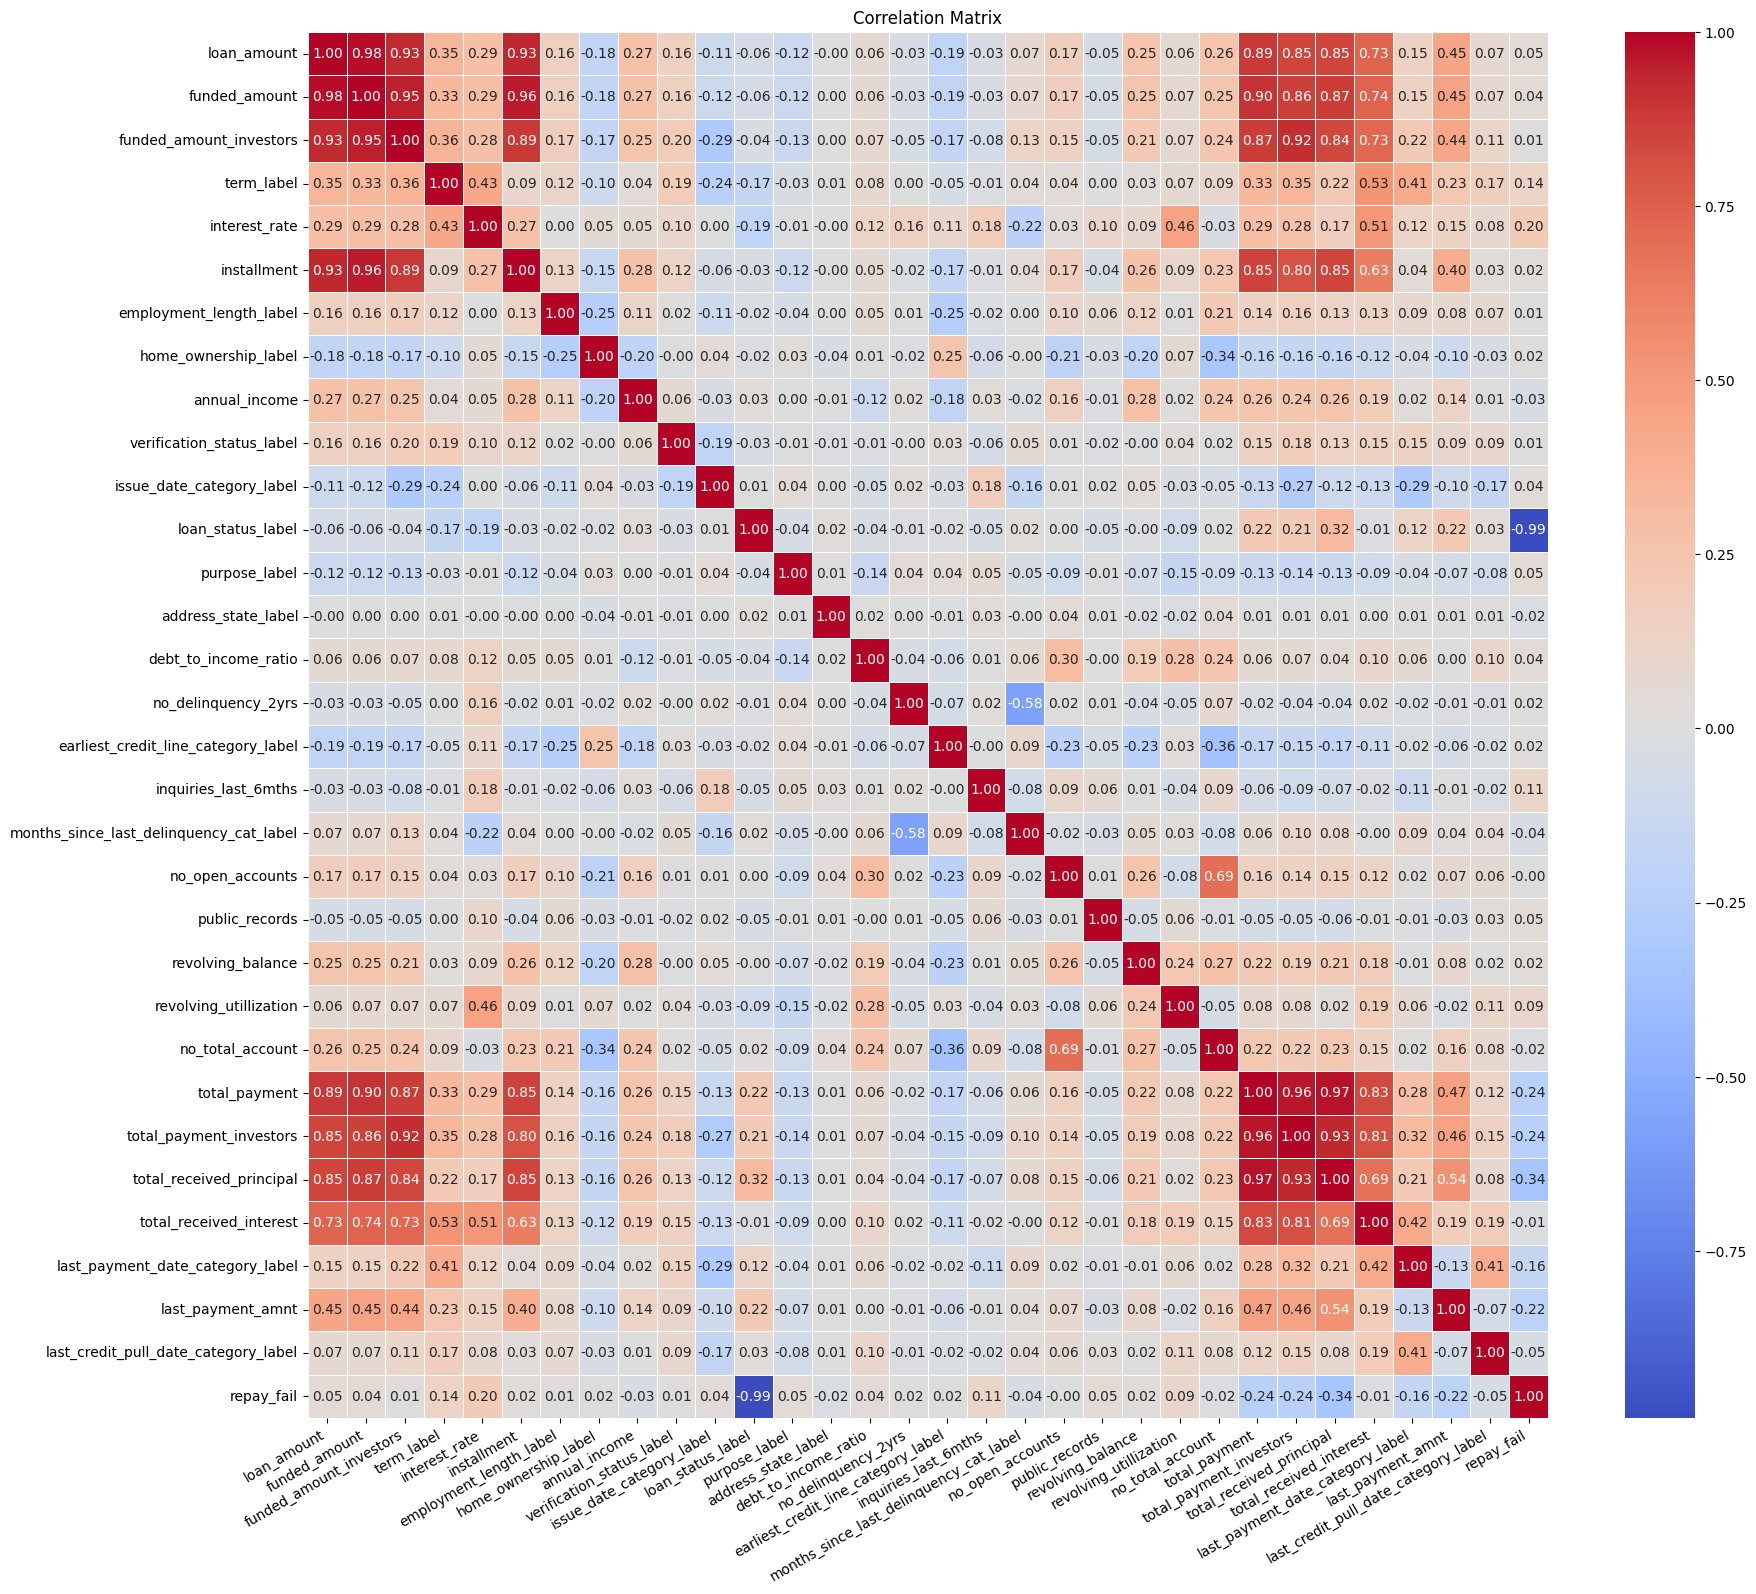

In [221]:
import seaborn as sns

columns_of_interest = loan_df.drop(['term','employment_length','home_ownership','verification_status','years_issue_date','issue_date_category','loan_status','purpose','address_state','year_since_earliest_credit_line'], axis=1)
columns_of_interest = columns_of_interest.drop(['earliest_credit_line_category','months_since_last_delinquency','months_since_last_delinquency_cat','last_payment_date_category','year_since_last_payment_date','years_last_credit_pull_date','last_credit_pull_date_category'], axis=1)

# Calculate the correlation matrix
correlation_matrix = columns_of_interest.corr()

# Display the correlation matrix
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=30, ha='right')
plt.show()

From the correlation matrix above, we can see that the variable 'repay_fail' has a higher negative correlation to the variable 'loan_status_label'.

Cramers V - to test association

In [222]:
import scipy.stats as ss

def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorical association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

In [223]:
y = loan_df.drop(['term','employment_length','home_ownership','verification_status','years_issue_date','issue_date_category','loan_status','purpose','address_state','year_since_earliest_credit_line','earliest_credit_line_category','months_since_last_delinquency','months_since_last_delinquency_cat','last_payment_date_category','last_credit_pull_date_category','repay_fail'], axis=1)
y

,loan_amount,funded_amount,funded_amount_investors,term_label,interest_rate,installment,employment_length_label,home_ownership_label,annual_income,verification_status_label,issue_date_category_label,loan_status_label,purpose_label,address_state_label,debt_to_income_ratio,no_delinquency_2yrs,earliest_credit_line_category_label,inquiries_last_6mths,months_since_last_delinquency_cat_label,no_open_accounts,public_records,revolving_balance,revolving_utillization,no_total_account,total_payment,total_payment_investors,total_received_principal,total_received_interest,last_payment_date_category_label,year_since_last_payment_date,last_payment_amnt,years_last_credit_pull_date,last_credit_pull_date_category_label
0,0.0,0.0,0.00000,0,0.00,0.00,0,4,0.0,0,2,1,6,50,0.00,0.0,5,0.0,7,0.0,0.0,0.0,0.000,1.0,0.000000,0.00,0.00,0.00,0,17.608219,0.00,17.608219,0
1,2500.0,2500.0,2500.00000,0,13.98,85.42,4,4,20004.0,0,0,8,9,22,19.86,0.0,6,5.0,7,7.0,0.0,981.0,0.213,10.0,3075.291779,3075.29,2500.00,575.29,1,11.106849,90.85,8.186301,2
2,5000.0,5000.0,5000.00000,0,15.95,175.67,4,4,59000.0,0,0,1,2,33,19.57,0.0,4,1.0,4,7.0,0.0,18773.0,0.999,15.0,2948.760000,2948.76,1909.02,873.81,1,12.772603,175.67,12.441096,1
3,7000.0,7000.0,7000.00000,0,9.91,225.58,10,0,53796.0,0,0,7,9,42,10.80,3.0,5,3.0,0,7.0,0.0,3269.0,0.472,20.0,8082.391880,8082.39,7000.00,1082.39,1,10.441096,1550.27,10.441096,1
4,2000.0,2000.0,2000.00000,0,5.42,60.32,10,4,30000.0,0,0,7,2,33,3.60,0.0,3,0.0,5,7.0,0.0,0.0,0.000,15.0,2161.663244,2161.66,2000.00,161.66,1,10.517808,53.12,8.186301,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37354,3000.0,3000.0,3000.00000,0,11.99,99.63,3,4,74250.0,1,0,7,1,5,22.17,0.0,5,2.0,7,12.0,0.0,16550.0,0.735,22.0,3586.619764,3586.62,3000.00,586.62,1,10.021918,100.30,8.186301,2
37355,10400.0,10400.0,10400.00000,0,13.49,352.88,9,4,62000.0,2,0,7,1,34,11.57,0.0,5,1.0,7,21.0,0.0,16898.0,0.397,33.0,12703.534030,12703.53,10400.00,2303.53,2,9.936986,393.08,8.186301,2
37356,16000.0,10550.0,10531.35818,1,14.96,250.77,10,0,95088.0,2,0,7,2,30,10.63,0.0,5,1.0,7,9.0,1.0,10386.0,0.622,25.0,14202.267530,14163.31,10550.00,3652.27,1,11.189041,5439.96,8.517808,2
37357,10000.0,10000.0,10000.00000,0,16.89,355.99,1,4,48720.0,0,0,7,2,6,18.97,0.0,6,2.0,7,8.0,0.0,7301.0,0.533,12.0,12815.178320,12815.18,10000.00,2815.18,1,10.021918,380.63,8.936986,2


In [224]:
for col in y:
    confusion_matrix = pd.crosstab(loan_df['repay_fail'], loan_df[col])
    value= cramers_v(confusion_matrix.values)
    if value > 0.2: 
        print("Column:", col)
        print(cramers_v(confusion_matrix.values))

Column: funded_amount_investors
0.24361012568409976
Column: interest_rate
0.21747906273730352
Column: installment
0.2721377728031689
Column: loan_status_label
0.9999063050037763
Column: total_payment
0.20185514928235943
Column: total_received_principal
0.8918268417713435
Column: total_received_interest
0.25455171939337135
Column: year_since_last_payment_date
0.26078009232811167
Column: years_last_credit_pull_date
0.21863352157503949


Univariate Selection

In [225]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = loan_df.drop(['term','employment_length','home_ownership','verification_status','years_issue_date','issue_date_category','loan_status','purpose','address_state','year_since_earliest_credit_line','earliest_credit_line_category','months_since_last_delinquency','months_since_last_delinquency_cat','last_payment_date_category','last_credit_pull_date_category','repay_fail'], axis=1)
y = loan_df['repay_fail']  #independent columns
 
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                       Specs         Score
26  total_received_principal  2.197024e+07
25   total_payment_investors  1.521520e+07
24             total_payment  1.474674e+07
30         last_payment_amnt  1.311046e+07
8              annual_income  2.709302e+06
21         revolving_balance  5.513512e+05
0                loan_amount  4.076792e+05
1              funded_amount  3.379664e+05
2    funded_amount_investors  3.323217e+04
11         loan_status_label  2.660374e+04


Feature Importance

[1.18003948e-02 1.77738492e-02 1.28680640e-02 1.85578547e-02
 7.48954183e-03 1.92934752e-02 8.84042755e-04 7.04564378e-04
 8.49824992e-04 9.23174734e-04 1.75460479e-03 7.32246217e-01
 9.39592806e-04 9.16770226e-04 9.02602752e-04 4.08032424e-04
 7.32234548e-04 1.74512510e-03 8.26222243e-04 8.30181483e-04
 4.89471985e-04 9.30596469e-04 2.02782085e-03 8.50785082e-04
 2.26551059e-02 1.92334814e-02 5.38537870e-02 4.72340021e-03
 1.35955071e-02 1.94677752e-02 2.34841870e-02 3.62887485e-03
 2.61283694e-03]


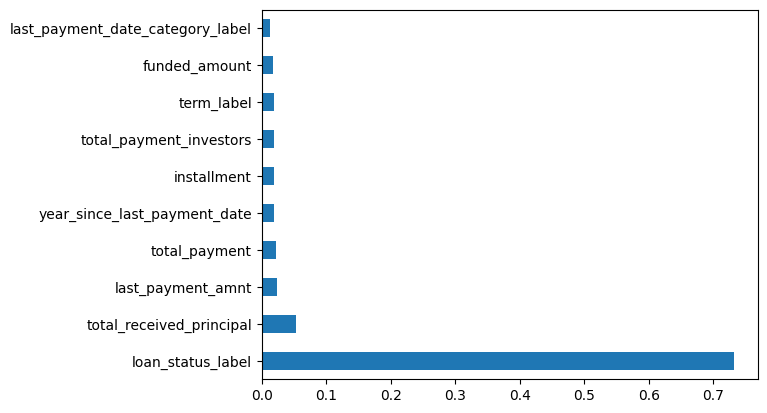

In [226]:
import pandas as pd
import numpy as np

X = loan_df.drop(['term','employment_length','home_ownership','verification_status','years_issue_date','issue_date_category','loan_status','purpose','address_state','year_since_earliest_credit_line','earliest_credit_line_category','months_since_last_delinquency','months_since_last_delinquency_cat','last_payment_date_category','last_credit_pull_date_category','repay_fail'], axis=1)
y = loan_df['repay_fail']  #independent columns
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()